In [1]:
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

import geopy
import googlemaps

import matplotlib.pyplot as plt
import seaborn as sns

# Configure image format to be ‘svg’
%config InlineBackend.figure_format = 'svg'

# allow visuals to render within notebook
%matplotlib inline 

In [2]:
# Make some room to see stuff (i.e. drop display limits on Pandas rows & cols - be careful w/ big df's!)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Import MTA Data From SQLite Database

In [3]:
engine = create_engine('sqlite:///../_PROJECT/mta_data.db')

engine.table_names()

/var/folders/16/my2sdbrn4hvfl3_91fx0wj9c0000gn/T/ipykernel_5135/152434287.py:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['mta_data']

In [4]:
# Check for any NULL values

pd.read_sql('''
            SELECT *
            FROM mta_data
            WHERE unit IS NULL 
               OR scp IS NULL
               OR station IS NULL
               OR linename IS NULL
               OR date IS NULL
               OR time IS NULL
               OR desc IS NULL
               OR entries IS NULL
               OR exits IS NULL;
            ''', con=engine)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


In [5]:
# Bring in just the data for May-June 2019 (order by ascending 'DATE'; don't bother importing 'EXITS' col)

# df_2019 = pd.read_sql('''
#                       SELECT (STATION || ' - ' || LINENAME || ' - ' || DIVISION) AS STATION_ID,
#                          STATION AS STATION_NAME, [C/A], UNIT, SCP,  DATE, TIME, DESC, ENTRIES
#                       FROM mta_data
#                       WHERE DATE = '04/30/2019' OR DATE LIKE '05%19' OR DATE LIKE '06%19'
#                       ORDER BY DATE ASC;
#                       ''', con=engine)

df_2019 = pd.read_sql('''
                      SELECT *
                      FROM mta_data
                      WHERE DATE = '04/30/2019' OR DATE LIKE '05%19' OR DATE LIKE '06%19'
                      ORDER BY DATE ASC;
                      ''', con=engine)

In [6]:
# Add a 'DATETIME' column (and drop 'DATE' & 'TIME' - can get either of these from 'DATETIME' if needed)

df_2019['DATETIME'] = pd.to_datetime(df_2019['DATE'] + ' ' + df_2019['TIME'])

# Make 'DATE' column a proper date format
df_2019['DATE'] = df_2019['DATETIME'].dt.date

df_2019.drop(columns=['TIME', 'EXITS'], inplace=True)

In [7]:
print(df_2019.shape)
display(df_2019.head())
display(df_2019.tail())

(3639340, 10)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038242,2019-04-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038261,2019-04-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038308,2019-04-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038474,2019-04-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038775,2019-04-30 16:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
3639335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 05:00:00
3639336,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 09:00:00
3639337,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 13:00:00
3639338,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 17:00:00
3639339,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 21:00:00


In [8]:
# Bring in just the data for May-June 2021 (order by ascending 'DATE'; don't bother importing 'EXITS' col)

# df_2021 = pd.read_sql('''
#                       SELECT (STATION || ' - ' || LINENAME || ' - ' || DIVISION) AS STATION_ID,
#                          STATION AS STATION_NAME, [C/A], UNIT, SCP,  DATE, TIME, DESC, ENTRIES
#                       FROM mta_data
#                       WHERE DATE = '04/30/2021' OR DATE LIKE '05%21' OR DATE LIKE '06%21'
#                       ORDER BY DATE ASC;
#                       ''', con=engine)

df_2021 = pd.read_sql('''
                      SELECT *
                      FROM mta_data
                      WHERE DATE = '04/30/2021' OR DATE LIKE '05%21' OR DATE LIKE '06%21'
                      ORDER BY DATE ASC;
                      ''', con=engine)

In [9]:
# Add a 'DATETIME' column (and drop 'DATE' & 'TIME' - can get either of these from 'DATETIME' if needed)

df_2021['DATETIME'] = pd.to_datetime(df_2021['DATE'] + ' ' + df_2021['TIME'])

# Make 'DATE' column a proper date format
df_2021['DATE'] = df_2021['DATETIME'].dt.date

df_2021.drop(columns=['TIME', 'EXITS'], inplace=True)

In [10]:
print(df_2021.shape)
display(df_2021.head())
display(df_2021.tail())

(3706606, 10)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564048,2021-04-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564059,2021-04-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564073,2021-04-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564118,2021-04-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564286,2021-04-30 16:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
3706601,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 05:00:00
3706602,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 09:00:00
3706603,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 13:00:00
3706604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 17:00:00
3706605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 21:00:00


# 2. Basic Cleaning

### 2a) Check for Duplicates
#### A single turnstile somwhere in the system is uniquely identified by C/A (Booth) + UNIT (Station) + SCP (Turnstile)

#### Start with df_2019:

In [11]:
check = df_2019.groupby(['C/A', 'UNIT', 'SCP', 'DATETIME'])['ENTRIES'] \
                        .count().sort_values(ascending=False)
check.reset_index().head()

,C/A,UNIT,SCP,DATETIME,ENTRIES
0,R249,R179,01-05-00,2019-06-27 00:00:00,4
1,N045,R187,01-06-00,2019-06-02 17:00:00,4
2,R174,R034,00-00-03,2019-06-08 00:00:00,4
3,N045,R187,01-00-00,2019-06-02 17:00:00,4
4,R174,R034,00-00-02,2019-06-08 00:00:00,4


In [12]:
for i in range(0, 6):
    display(df_2019[(df_2019['C/A'] == check.reset_index().iloc[i, 0:1].values[0]) & 
                    (df_2019['UNIT'] == check.reset_index().iloc[i, 1:2].values[0]) &
                    (df_2019['SCP'] == check.reset_index().iloc[i, 2:3].values[0]) &
                    (df_2019['DATETIME'] == check.reset_index().iloc[i, 3:4].values[0])])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
3427686,R249,R179,01-05-00,86 ST,456,IRT,2019-06-27,REGULAR,6,2019-06-27
3427687,R249,R179,01-05-00,86 ST,456,IRT,2019-06-27,RECOVR AUD,11,2019-06-27
3457150,R249,R179,01-05-00,86 ST,456,IRT,2019-06-27,REGULAR,6,2019-06-27
3457151,R249,R179,01-05-00,86 ST,456,IRT,2019-06-27,RECOVR AUD,11,2019-06-27


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
1940800,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,2019-06-02,REGULAR,2254050,2019-06-02 17:00:00
1940801,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,2019-06-02,RECOVR AUD,2254049,2019-06-02 17:00:00
1969768,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,2019-06-02,REGULAR,2254050,2019-06-02 17:00:00
1969769,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,2019-06-02,RECOVR AUD,2254049,2019-06-02 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
2306436,R174,R034,00-00-03,125 ST,1,IRT,2019-06-08,REGULAR,3828801,2019-06-08
2306437,R174,R034,00-00-03,125 ST,1,IRT,2019-06-08,RECOVR AUD,3828804,2019-06-08
2335466,R174,R034,00-00-03,125 ST,1,IRT,2019-06-08,REGULAR,3828801,2019-06-08
2335467,R174,R034,00-00-03,125 ST,1,IRT,2019-06-08,RECOVR AUD,3828804,2019-06-08


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
1940782,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,2019-06-02,REGULAR,5254570,2019-06-02 17:00:00
1940783,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,2019-06-02,RECOVR AUD,5254568,2019-06-02 17:00:00
1969750,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,2019-06-02,REGULAR,5254570,2019-06-02 17:00:00
1969751,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,2019-06-02,RECOVR AUD,5254568,2019-06-02 17:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
2306430,R174,R034,00-00-02,125 ST,1,IRT,2019-06-08,REGULAR,6091547,2019-06-08
2306431,R174,R034,00-00-02,125 ST,1,IRT,2019-06-08,RECOVR AUD,6091548,2019-06-08
2335460,R174,R034,00-00-02,125 ST,1,IRT,2019-06-08,REGULAR,6091547,2019-06-08
2335461,R174,R034,00-00-02,125 ST,1,IRT,2019-06-08,RECOVR AUD,6091548,2019-06-08


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
2467844,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,2019-06-11,REGULAR,2258033,2019-06-11 21:00:00
2467845,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,2019-06-11,RECOVR AUD,2258031,2019-06-11 21:00:00
2496957,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,2019-06-11,REGULAR,2258033,2019-06-11 21:00:00
2496958,N045,R187,01-06-00,81 ST-MUSEUM,BC,IND,2019-06-11,RECOVR AUD,2258031,2019-06-11 21:00:00


#### Looks like accidental data duplication and some RECOV AUDs virtually identical to REGULARs; will just drop all the duplicates

In [13]:
print(df_2019.shape)

df_2019 = df_2019.sort_values(by=['C/A', 'UNIT', 'SCP', 'DATETIME'], 
                              ascending=False) \
                             .drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'DATETIME'])

df_2019.reset_index(drop=True, inplace=True)
print(df_2019.shape)

(3639340, 10)
(1819646, 10)


In [14]:
# Re-check for duplicates

check = df_2019.groupby(['C/A', 'UNIT', 'SCP', 'DATETIME'])['ENTRIES'] \
                        .count().sort_values(ascending=False)
check.reset_index().head()

,C/A,UNIT,SCP,DATETIME,ENTRIES
0,A002,R051,02-00-00,2019-04-30 00:00:00,1
1,R142,R293,01-00-01,2019-05-12 18:00:00,1
2,R142,R293,01-00-01,2019-05-14 06:00:00,1
3,R142,R293,01-00-01,2019-05-14 02:00:00,1
4,R142,R293,01-00-01,2019-05-13 22:00:00,1


#### Now deal with duplicates in df_2021:

In [15]:
check = df_2021.groupby(['C/A', 'UNIT', 'SCP', 'DATETIME'])['ENTRIES'] \
                         .count().sort_values(ascending=False)
check.reset_index().head()

,C/A,UNIT,SCP,DATETIME,ENTRIES
0,B024,R211,00-05-00,2021-05-02 12:00:00,4
1,B024,R211,00-05-00,2021-05-05 12:00:00,4
2,N329,R201,00-03-02,2021-05-08 05:00:00,4
3,N329,R201,00-03-02,2021-05-08 01:00:00,4
4,N335,R158,01-00-03,2021-06-20 18:30:00,4


In [16]:
for i in range(0, 6):
    display(df_2021[(df_2021['C/A'] == check.reset_index().iloc[i, 0:1].values[0]) & 
                    (df_2021['UNIT'] == check.reset_index().iloc[i, 1:2].values[0]) &
                    (df_2021['SCP'] == check.reset_index().iloc[i, 2:3].values[0]) &
                    (df_2021['DATETIME'] == check.reset_index().iloc[i, 3:4].values[0])])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
121785,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-02,REGULAR,262152,2021-05-02 12:00:00
121786,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-02,RECOVR AUD,13,2021-05-02 12:00:00
151574,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-02,REGULAR,262152,2021-05-02 12:00:00
151575,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-02,RECOVR AUD,13,2021-05-02 12:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
301051,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-05,REGULAR,262152,2021-05-05 12:00:00
301052,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-05,RECOVR AUD,21,2021-05-05 12:00:00
330870,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-05,REGULAR,262152,2021-05-05 12:00:00
330871,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-05,RECOVR AUD,21,2021-05-05 12:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
490387,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,2021-05-08,REGULAR,4825280,2021-05-08 05:00:00
490388,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,2021-05-08,RECOVR AUD,12538860,2021-05-08 05:00:00
520213,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,2021-05-08,REGULAR,4825280,2021-05-08 05:00:00
520214,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,2021-05-08,RECOVR AUD,12538860,2021-05-08 05:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
490385,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,2021-05-08,REGULAR,4825276,2021-05-08 01:00:00
490386,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,2021-05-08,RECOVR AUD,12538859,2021-05-08 01:00:00
520211,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,2021-05-08,REGULAR,4825276,2021-05-08 01:00:00
520212,N329,R201,00-03-02,WOODHAVEN BLVD,MR,IND,2021-05-08,RECOVR AUD,12538859,2021-05-08 01:00:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
3061698,N335,R158,01-00-03,KEW GARDENS,EF,IND,2021-06-20,REGULAR,5201958,2021-06-20 18:30:00
3061699,N335,R158,01-00-03,KEW GARDENS,EF,IND,2021-06-20,RECOVR AUD,5201960,2021-06-20 18:30:00
3091640,N335,R158,01-00-03,KEW GARDENS,EF,IND,2021-06-20,REGULAR,5201958,2021-06-20 18:30:00
3091641,N335,R158,01-00-03,KEW GARDENS,EF,IND,2021-06-20,RECOVR AUD,5201960,2021-06-20 18:30:00


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME
181380,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-03,REGULAR,262152,2021-05-03 20:00:00
181381,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-03,RECOVR AUD,16,2021-05-03 20:00:00
211194,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-03,REGULAR,262152,2021-05-03 20:00:00
211195,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-03,RECOVR AUD,16,2021-05-03 20:00:00


#### Looks like a similar situation as with df_2019; some RECOVR AUDs look like trivial tests of some sort; will just drop the duplicates

In [17]:
print(df_2021.shape)

df_2021 = df_2021.sort_values(by=['C/A', 'UNIT', 'SCP', 'DATETIME'], 
                              ascending=False) \
                             .drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'DATETIME'])

df_2021.reset_index(drop=True, inplace=True)
print(df_2021.shape)

(3706606, 10)
(1853257, 10)


In [18]:
# Re-check for duplicates

check = df_2021.groupby(['C/A', 'UNIT', 'SCP', 'DATETIME'])['ENTRIES'] \
                         .count().sort_values(ascending=False)
check.reset_index().head()

,C/A,UNIT,SCP,DATETIME,ENTRIES
0,A002,R051,02-00-00,2021-04-30 00:00:00,1
1,R138,R293,00-03-04,2021-05-08 22:00:00,1
2,R138,R293,00-03-04,2021-05-13 06:00:00,1
3,R138,R293,00-03-04,2021-05-13 02:00:00,1
4,R138,R293,00-03-04,2021-05-12 22:00:00,1


### 2b) Find common set of Stations in 2019 and 2021 datasets (Station roughly equates to the 'UNIT' column)

In [19]:
print(df_2019['UNIT'].unique().shape)
print(df_2021['UNIT'].unique().shape)

print(np.setdiff1d(df_2019['UNIT'].unique(), df_2021['UNIT'].unique()))
print(np.setdiff1d(df_2021['UNIT'].unique(), df_2019['UNIT'].unique()))

(469,)
(469,)
['R260']
['R094']


#### Each year's data has one station not present in the other - will find the common set between the two years

In [20]:
common_units = np.intersect1d(df_2019['UNIT'].unique(), df_2021['UNIT'].unique())
common_units.shape

(468,)

#### Now limit both year's datasets down to these common stations (UNITs)

In [21]:
print(df_2019.shape)
df_2019 = df_2019[df_2019['UNIT'].isin(common_units)]
df_2019.reset_index(drop=True, inplace=True)
print(df_2019.shape)

(1819646, 10)
(1817754, 10)


In [22]:
print(df_2021.shape)
df_2021 = df_2021[df_2021['UNIT'].isin(common_units)]
df_2021.reset_index(drop=True, inplace=True)
print(df_2021.shape)

(1853257, 10)
(1848056, 10)


### 2c) Calculate NET_ENTRIES per unique turnstile (C/A + UNIT + SCP) during every observation window
#### Start with df_2019

In [23]:
df_2019['NET_ENTRIES'] = df_2019.groupby(['C/A', 'UNIT', 'SCP'])['ENTRIES'].diff(-1)

display(df_2019.head())
display(df_2019.tail())

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME,NET_ENTRIES
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 21:00:00,0.0
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 17:00:00,0.0
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 13:00:00,0.0
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 09:00:00,0.0
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 05:00:00,0.0


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME,NET_ENTRIES
1817749,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038775,2019-04-30 16:00:00,301.0
1817750,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038474,2019-04-30 12:00:00,166.0
1817751,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038308,2019-04-30 08:00:00,47.0
1817752,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038261,2019-04-30 04:00:00,19.0
1817753,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038242,2019-04-30 00:00:00,NaN


In [24]:
df_2019['NET_ENTRIES'].describe()

count    1.812853e+06
mean     1.414463e+03
std      3.622152e+06
min     -1.661416e+09
25%      9.000000e+00
50%      7.100000e+01
75%      2.340000e+02
max      2.055526e+09
Name: NET_ENTRIES, dtype: float64

#### Assumption 1: Some turnstiles count backwards, accounting for the negatives; just take absolute value of everything
#### Assumption 2: >10,000 entries in 4 hours is impossible (~42 passengers/min), so must be counter rollover -> set these to NaN

In [25]:
df_2019['NET_ENTRIES'] = df_2019['NET_ENTRIES'].apply(lambda x: np.abs(x) if np.abs(x) <= 10000.0 else np.nan)

In [26]:
# This looks much better:

df_2019['NET_ENTRIES'].describe()

count    1.812337e+06
mean     1.743630e+02
std      2.567606e+02
min      0.000000e+00
25%      1.000000e+01
50%      7.400000e+01
75%      2.380000e+02
max      9.866000e+03
Name: NET_ENTRIES, dtype: float64

#### Repeat this whole process for df_2021

In [27]:
df_2021['NET_ENTRIES'] = df_2021.groupby(['C/A', 'UNIT', 'SCP'])['ENTRIES'].diff(-1)

display(df_2021.head())
display(df_2021.tail())

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME,NET_ENTRIES
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 21:00:00,0.0
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 17:00:00,0.0
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 13:00:00,0.0
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 09:00:00,0.0
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 05:00:00,0.0


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME,NET_ENTRIES
1848051,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564286,2021-04-30 16:00:00,168.0
1848052,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564118,2021-04-30 12:00:00,45.0
1848053,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564073,2021-04-30 08:00:00,14.0
1848054,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564059,2021-04-30 04:00:00,11.0
1848055,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564048,2021-04-30 00:00:00,NaN


In [28]:
df_2021['NET_ENTRIES'].describe()

count    1.843044e+06
mean    -1.257696e+02
std      1.374865e+06
min     -9.768675e+08
25%      3.000000e+00
50%      2.500000e+01
75%      8.000000e+01
max      1.179009e+09
Name: NET_ENTRIES, dtype: float64

In [29]:
# Absolute value of NET_ENTRIES and throw out > 10,000 values

df_2021['NET_ENTRIES'] = df_2021['NET_ENTRIES'].apply(lambda x: np.abs(x) if np.abs(x) <= 10000.0 else np.nan)

In [30]:
# This looks much better:

df_2021['NET_ENTRIES'].describe()

count    1.842857e+06
mean     5.907629e+01
std      8.610863e+01
min      0.000000e+00
25%      3.000000e+00
50%      2.600000e+01
75%      8.100000e+01
max      7.842000e+03
Name: NET_ENTRIES, dtype: float64

#### While we're here, let's add a WEEKDAY column (1 for M-F, 0 for Sat or Sun)

In [31]:
# pd.Series.dt.weekday: 0 = Mon, 6 = Sun

df_2019['WEEKDAY'] = pd.to_datetime(df_2019['DATE']).dt.weekday.apply(lambda x: 1 if x < 5 else 0)
display(df_2019.sample(10))

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME,NET_ENTRIES,WEEKDAY
1017909,N343,R019,00-00-08,JAMAICA 179 ST,F,IND,2019-06-07,REGULAR,9472821,2019-06-07 00:00:00,36.0,1
726235,PTH18,R549,01-00-07,NEWARK BM BW,1,PTH,2019-06-04,REGULAR,428005,2019-06-04 00:15:17,38.0,1
26061,R646,R110,01-00-01,FLATBUSH AV-B.C,25,IRT,2019-05-17,REGULAR,1506950514,2019-05-17 01:00:00,60.0,1
1255337,N110,R283,00-06-00,LAFAYETTE AV,C,IND,2019-05-18,REGULAR,9052127,2019-05-18 05:00:00,8.0,0
1446833,K025,R404,00-03-00,FRESH POND RD,M,BMT,2019-06-09,REGULAR,14468672,2019-06-09 13:00:00,236.0,0
936962,N510,R163,02-06-01,14 ST,FLM123,IND,2019-06-05,REGULAR,173270,2019-06-05 00:00:00,3.0,1
684266,R102,R304,01-06-00,RECTOR ST,1,IRT,2019-05-10,REGULAR,44002,2019-05-10 16:00:00,9.0,1
532043,R174,R034,00-00-04,125 ST,1,IRT,2019-06-06,REGULAR,4658013,2019-06-06 08:00:00,159.0,1
786619,PTH03,R552,00-01-06,JOURNAL SQUARE,1,PTH,2019-06-26,REGULAR,7379,2019-06-26 13:18:49,108.0,1
611919,R138,R293,00-03-00,34 ST-PENN STA,123ACE,IRT,2019-05-06,REGULAR,98252788,2019-05-06 06:00:00,14.0,1


In [32]:
df_2021['WEEKDAY'] = pd.to_datetime(df_2021['DATE']).dt.weekday.apply(lambda x: 1 if x < 5 else 0)
display(df_2021.sample(10))

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME,NET_ENTRIES,WEEKDAY
1676083,B031,R172,01-06-00,BRIGHTON BEACH,BQ,BMT,2021-06-03,REGULAR,1732600,2021-06-03 08:00:00,9.0,1
876657,N550,R242,01-05-00,18 AV,F,IND,2021-04-30,REGULAR,83886170,2021-04-30 16:00:00,0.0,1
178158,R517,R291,01-06-00,33 ST-RAWSON ST,7,IRT,2021-05-26,REGULAR,3046368,2021-05-26 08:00:00,34.0,1
1013969,N400A,R359,02-06-00,COURT SQ,EMG,IND,2021-06-12,REGULAR,101172328,2021-06-12 04:00:00,5.0,0
139530,R532,R328,00-05-04,METS-WILLETS PT,7,IRT,2021-04-30,REGULAR,253458,2021-04-30 05:00:00,0.0,1
808852,PTH01,R549,00-00-02,NEWARK HW BMEBE,1,PTH,2021-05-30,REGULAR,8307,2021-05-30 14:18:35,0.0,0
1694093,B022,R229,00-05-02,AVENUE M,BQ,BMT,2021-06-28,REGULAR,32028,2021-06-28 12:00:00,77.0,1
964722,N503,R021,00-00-01,42 ST-BRYANT PK,BDFM7,IND,2021-05-09,REGULAR,210541,2021-05-09 08:00:00,5.0,0
786516,PTH04,R551,00-00-01,GROVE STREET,1,PTH,2021-06-24,REGULAR,20007,2021-06-24 16:49:06,27.0,1
242652,R411,R450,01-00-01,LONGWOOD AV,6,IRT,2021-05-21,REGULAR,100727211,2021-05-21 13:00:00,10.0,1


### 2d) Find NET_DAILY_ENTRIES per unique turnstile (C/A + UNIT + SCP)  (sum up NET_ENTRIES)

In [33]:
df_2019['NET_DAILY_ENTRIES'] = df_2019.groupby(['C/A', 'UNIT', 'SCP', 'DATE'])['NET_ENTRIES'].transform(sum)

display(df_2019.head())
display(df_2019.tail())

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME,NET_ENTRIES,WEEKDAY,NET_DAILY_ENTRIES
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 21:00:00,0.0,0,0.0
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 17:00:00,0.0,0,0.0
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 13:00:00,0.0,0,0.0
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 09:00:00,0.0,0,0.0
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2019-06-30,REGULAR,5554,2019-06-30 05:00:00,0.0,0,0.0


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME,NET_ENTRIES,WEEKDAY,NET_DAILY_ENTRIES
1817749,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038775,2019-04-30 16:00:00,301.0,1,1278.0
1817750,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038474,2019-04-30 12:00:00,166.0,1,1278.0
1817751,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038308,2019-04-30 08:00:00,47.0,1,1278.0
1817752,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038261,2019-04-30 04:00:00,19.0,1,1278.0
1817753,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-04-30,REGULAR,7038242,2019-04-30 00:00:00,NaN,1,1278.0


#### Can now drop ENTRIES, NET_ENTRIES, DATETIME & retain one just row per unique turnstile per day (and get rid of April 30th data)

In [34]:
df_2019['ID'] = df_2019['C/A'] + ' - ' + df_2019['UNIT'] + ' - ' + df_2019['SCP']
daily_per_turnstile_2019 = \
      df_2019[['ID', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 
               'NET_DAILY_ENTRIES', 'WEEKDAY']] \
               .groupby(['ID', 'DATE']).first().reset_index() \
               .sort_values(by=['ID', 'DATE'])

In [35]:
# Drop the 4/30/2019 rows

print(daily_per_turnstile_2019.shape)
daily_per_turnstile_2019 = daily_per_turnstile_2019[ \
                                pd.to_datetime(daily_per_turnstile_2019['DATE']) != pd.to_datetime('2019-04-30')]
daily_per_turnstile_2019.reset_index(drop=True, inplace=True)
print(daily_per_turnstile_2019.shape)
display(daily_per_turnstile_2019.head())
display(daily_per_turnstile_2019.tail())

(300165, 10)
(295338, 10)


,ID,DATE,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,NET_DAILY_ENTRIES,WEEKDAY
0,A002 - R051 - 02-00-00,2019-05-01,A002,R051,02-00-00,59 ST,NQR456W,BMT,1555.0,1
1,A002 - R051 - 02-00-00,2019-05-02,A002,R051,02-00-00,59 ST,NQR456W,BMT,1555.0,1
2,A002 - R051 - 02-00-00,2019-05-03,A002,R051,02-00-00,59 ST,NQR456W,BMT,1576.0,1
3,A002 - R051 - 02-00-00,2019-05-04,A002,R051,02-00-00,59 ST,NQR456W,BMT,822.0,0
4,A002 - R051 - 02-00-00,2019-05-05,A002,R051,02-00-00,59 ST,NQR456W,BMT,635.0,0


,ID,DATE,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,NET_DAILY_ENTRIES,WEEKDAY
295333,TRAM2 - R469 - 00-05-01,2019-06-26,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,0.0,1
295334,TRAM2 - R469 - 00-05-01,2019-06-27,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,0.0,1
295335,TRAM2 - R469 - 00-05-01,2019-06-28,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,0.0,1
295336,TRAM2 - R469 - 00-05-01,2019-06-29,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,0.0,0
295337,TRAM2 - R469 - 00-05-01,2019-06-30,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,0.0,0


#### Repeat this process for 2021 data

In [36]:
df_2021['NET_DAILY_ENTRIES'] = df_2021.groupby(['C/A', 'UNIT', 'SCP', 'DATE'])['NET_ENTRIES'].transform(sum)

display(df_2021.head())
display(df_2021.tail())

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME,NET_ENTRIES,WEEKDAY,NET_DAILY_ENTRIES
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 21:00:00,0.0,1,0.0
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 17:00:00,0.0,1,0.0
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 13:00:00,0.0,1,0.0
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 09:00:00,0.0,1,0.0
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-06-30,REGULAR,5554,2021-06-30 05:00:00,0.0,1,0.0


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DESC,ENTRIES,DATETIME,NET_ENTRIES,WEEKDAY,NET_DAILY_ENTRIES
1848051,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564286,2021-04-30 16:00:00,168.0,1,469.0
1848052,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564118,2021-04-30 12:00:00,45.0,1,469.0
1848053,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564073,2021-04-30 08:00:00,14.0,1,469.0
1848054,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564059,2021-04-30 04:00:00,11.0,1,469.0
1848055,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-04-30,REGULAR,7564048,2021-04-30 00:00:00,NaN,1,469.0


#### Can now drop ENTRIES, NET_ENTRIES, DATETIME & retain one just row per unique turnstile per day (and get rid of April 30th data)

In [37]:
df_2021['ID'] = df_2021['C/A'] + ' - ' + df_2021['UNIT'] + ' - ' + df_2021['SCP']
daily_per_turnstile_2021 = \
      df_2021[['ID', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 
               'NET_DAILY_ENTRIES','WEEKDAY']] \
               .groupby(['ID', 'DATE']).first().reset_index() \
               .sort_values(by=['ID', 'DATE'])

In [38]:
# Drop the 4/30/2021 rows

print(daily_per_turnstile_2021.shape)
daily_per_turnstile_2021 = daily_per_turnstile_2021[ \
                                pd.to_datetime(daily_per_turnstile_2021['DATE']) != pd.to_datetime('2021-04-30')]
daily_per_turnstile_2019.reset_index(drop=True, inplace=True)
print(daily_per_turnstile_2021.shape)
display(daily_per_turnstile_2021.head())
display(daily_per_turnstile_2021.tail())

(308646, 10)
(303670, 10)


,ID,DATE,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,NET_DAILY_ENTRIES,WEEKDAY
1,A002 - R051 - 02-00-00,2021-05-01,A002,R051,02-00-00,59 ST,NQR456W,BMT,457.0,0
2,A002 - R051 - 02-00-00,2021-05-02,A002,R051,02-00-00,59 ST,NQR456W,BMT,326.0,0
3,A002 - R051 - 02-00-00,2021-05-03,A002,R051,02-00-00,59 ST,NQR456W,BMT,498.0,1
4,A002 - R051 - 02-00-00,2021-05-04,A002,R051,02-00-00,59 ST,NQR456W,BMT,566.0,1
5,A002 - R051 - 02-00-00,2021-05-05,A002,R051,02-00-00,59 ST,NQR456W,BMT,600.0,1


,ID,DATE,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,NET_DAILY_ENTRIES,WEEKDAY
308641,TRAM2 - R469 - 00-05-01,2021-06-26,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,0.0,0
308642,TRAM2 - R469 - 00-05-01,2021-06-27,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,0.0,0
308643,TRAM2 - R469 - 00-05-01,2021-06-28,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,0.0,1
308644,TRAM2 - R469 - 00-05-01,2021-06-29,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,0.0,1
308645,TRAM2 - R469 - 00-05-01,2021-06-30,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,0.0,1


### 2e) Figure out which turnstiles all belong to the same station and sum up station-level NET_DAILY_ENTRIES

#### While UNIT ("Remote Unit") generally denotes a station, certain stations actually have several UNITs associated with them; the term "Complex" describes the physical location where a Remote Unit resides.

Import MTA Complex List Dataset (based on MTA-provided data & augmented slightly by Chris Whong); found at the following link:

https://qri.cloud/nyc-transit-data/remote_complex_lookup

In [39]:
# NOTE: The 'remote' column in this dataset refers to the same entity as 'UNIT' in the turnstile data
#         (the full name is technically 'Remote Unit'); Also, 'booth' below refers to the same entity
#         as 'C/A' in the turnstile data

complex_list = pd.read_csv('nyc_transit_data_remote_complex_lookup.csv')

print(complex_list.shape)
complex_list

(776, 6)


,remote,booth,complex_id,station,line_name,division
0,R001,A060,635.0,WHITEHALL ST,R1,BMT
1,R001,A058,635.0,WHITEHALL ST,R1,BMT
2,R001,R101S,635.0,SOUTH FERRY,R1,IRT
3,R002,A077,628.0,FULTON ST,ACJZ2345,BMT
4,R002,A081,628.0,FULTON ST,ACJZ2345,BMT
5,R002,A082,628.0,FULTON ST,ACJZ2345,BMT
6,R003,J025,86.0,CYPRESS HILLS,J,BMT
7,R004,J028,85.0,ELDERTS LANE,JZ,BMT
8,R005,J030,84.0,FOREST PARKWAY,J,BMT
9,R006,J031,83.0,WOODHAVEN BLVD,JZ,BMT


Now import the dataset that maps complex_id to physical location of each "Complex" (MTA-provided data but again slightly modified by Chris Whong). Can be found at the following link: 

https://qri.cloud/nyc-transit-data/turnstiles_station_list

In [40]:
station_locations = pd.read_csv('nyc_transit_turnstiles_station_list.csv')

print(station_locations.shape)
station_locations

(511, 14)


,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4.0,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5.0,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan
5,6,6.0,6,R08,BMT,Astoria,39 Av,Q,N W,Elevated,40.752882,-73.932755,Astoria - Ditmars Blvd,Manhattan
6,7,7.0,613,R11,BMT,Astoria,Lexington Av/59 St,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn
7,8,8.0,8,R13,BMT,Astoria,5 Av/59 St,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn
8,9,9.0,9,R14,BMT,Broadway - Brighton,57 St - 7 Av,M,N Q R W,Subway,40.764664,-73.980658,Uptown & Queens,Downtown & Brooklyn
9,10,10.0,10,R15,BMT,Broadway - Brighton,49 St,M,N R W,Subway,40.759901,-73.984139,Uptown & Queens,Downtown & Brooklyn


In [41]:
# Let's drop some unnecessary columns from station_locations

station_locations = station_locations[['complex_id', 'division', 'line', 'stop_name', 
                                       'borough', 'gtfs_latitude', 'gtfs_longitude']]
station_locations.head()

,complex_id,division,line,stop_name,borough,gtfs_latitude,gtfs_longitude
0,1,BMT,Astoria,Astoria - Ditmars Blvd,Q,40.775036,-73.912034
1,2,BMT,Astoria,Astoria Blvd,Q,40.770258,-73.917843
2,3,BMT,Astoria,30 Av,Q,40.766779,-73.921479
3,4,BMT,Astoria,Broadway,Q,40.761820,-73.925508
4,5,BMT,Astoria,36 Av,Q,40.756804,-73.929575


#### Now merge complex_list with station_locations

In [42]:
station_locations['complex_id'].dtype

dtype('O')

In [43]:
# Need to convert 'complex_id' in complex_list to same format

print(complex_list['complex_id'].dtype)

complex_list['complex_id'] = complex_list['complex_id'].apply(lambda x: str(x).replace('.0','')).astype('str')
print(complex_list['complex_id'].dtype)

float64
object


In [44]:
complex_locations = complex_list.merge(right=station_locations, 
                                       how='inner', 
                                       on=['complex_id', 'division'])

In [45]:
print(complex_locations.shape)

(809, 11)


In [46]:
complex_locations.head(20)

,remote,booth,complex_id,station,line_name,division,line,stop_name,borough,gtfs_latitude,gtfs_longitude
0,R001,A060,635,WHITEHALL ST,R1,BMT,Broadway,Whitehall St,M,40.703087,-74.012994
1,R001,A058,635,WHITEHALL ST,R1,BMT,Broadway,Whitehall St,M,40.703087,-74.012994
2,R001,R101S,635,SOUTH FERRY,R1,IRT,Broadway - 7Av,South Ferry,M,40.702068,-74.013664
3,R002,A077,628,FULTON ST,ACJZ2345,BMT,Jamaica,Fulton St,M,40.710374,-74.007582
4,R002,A081,628,FULTON ST,ACJZ2345,BMT,Jamaica,Fulton St,M,40.710374,-74.007582
5,R002,A082,628,FULTON ST,ACJZ2345,BMT,Jamaica,Fulton St,M,40.710374,-74.007582
6,R003,J025,86,CYPRESS HILLS,J,BMT,Jamaica,Cypress Hills,Bk,40.689941,-73.872550
7,R004,J028,85,ELDERTS LANE,JZ,BMT,Jamaica,75 St,Q,40.691324,-73.867139
8,R005,J030,84,FOREST PARKWAY,J,BMT,Jamaica,85 St - Forest Pkwy,Q,40.692435,-73.860010
9,R006,J031,83,WOODHAVEN BLVD,JZ,BMT,Jamaica,Woodhaven Blvd,Q,40.693879,-73.851576


#### Now we can merge complex_locations with the daily_per_turnstile datasets for 2019 & 2021

In [47]:
complex_locations.columns = [col.upper() for col in complex_locations.columns]
complex_locations.head()

,REMOTE,BOOTH,COMPLEX_ID,STATION,LINE_NAME,DIVISION,LINE,STOP_NAME,BOROUGH,GTFS_LATITUDE,GTFS_LONGITUDE
0,R001,A060,635,WHITEHALL ST,R1,BMT,Broadway,Whitehall St,M,40.703087,-74.012994
1,R001,A058,635,WHITEHALL ST,R1,BMT,Broadway,Whitehall St,M,40.703087,-74.012994
2,R001,R101S,635,SOUTH FERRY,R1,IRT,Broadway - 7Av,South Ferry,M,40.702068,-74.013664
3,R002,A077,628,FULTON ST,ACJZ2345,BMT,Jamaica,Fulton St,M,40.710374,-74.007582
4,R002,A081,628,FULTON ST,ACJZ2345,BMT,Jamaica,Fulton St,M,40.710374,-74.007582


In [48]:
# Get consistent column names between the two dataframes to be merged

daily_per_turnstile_2019.columns = ['ID', 'DATE', 'BOOTH', 'REMOTE', 'SCP', 'STATION', 
                                    'LINE_NAME', 'DIVISION', 'NET_DAILY_ENTRIES', 'WEEKDAY']
daily_per_turnstile_2019.head()

,ID,DATE,BOOTH,REMOTE,SCP,STATION,LINE_NAME,DIVISION,NET_DAILY_ENTRIES,WEEKDAY
0,A002 - R051 - 02-00-00,2019-05-01,A002,R051,02-00-00,59 ST,NQR456W,BMT,1555.0,1
1,A002 - R051 - 02-00-00,2019-05-02,A002,R051,02-00-00,59 ST,NQR456W,BMT,1555.0,1
2,A002 - R051 - 02-00-00,2019-05-03,A002,R051,02-00-00,59 ST,NQR456W,BMT,1576.0,1
3,A002 - R051 - 02-00-00,2019-05-04,A002,R051,02-00-00,59 ST,NQR456W,BMT,822.0,0
4,A002 - R051 - 02-00-00,2019-05-05,A002,R051,02-00-00,59 ST,NQR456W,BMT,635.0,0


In [49]:
daily_per_turnstile_loc_2019 = complex_locations.merge(right=daily_per_turnstile_2019, 
                                                       how='inner',
                                                       on=['BOOTH', 'REMOTE', 'DIVISION'])

In [50]:
# Didn't even lose 5000 rows here - pretty good!

print(daily_per_turnstile_2019.shape)
daily_per_turnstile_loc_2019.shape

(295338, 10)


(290643, 18)

In [51]:
# Check for NaNs

daily_per_turnstile_loc_2019[daily_per_turnstile_loc_2019.isna().any(axis=1)].shape[0]

0

In [52]:
# STATION_x and STATION_y seem to match up well! (LINE_NAME_x and LINE_NAME_y, too!)

daily_per_turnstile_loc_2019.sample(n=20)

,REMOTE,BOOTH,COMPLEX_ID,STATION_x,LINE_NAME_x,DIVISION,LINE,STOP_NAME,BOROUGH,GTFS_LATITUDE,GTFS_LONGITUDE,ID,DATE,SCP,STATION_y,LINE_NAME_y,NET_DAILY_ENTRIES,WEEKDAY
163358,R172,B029,55,BRIGHTON BEACH,BQ,BMT,Broadway - Brighton,Brighton Beach,Bk,40.577621,-73.961376,B029 - R172 - 00-00-01,2019-06-18,00-00-01,BRIGHTON BEACH,BQ,1075.0,1
140919,R142,A061,625,ESSEX ST,FJMZ,BMT,Jamaica,Essex St,M,40.718315,-73.987437,A061 - R142 - 00-03-03,2019-05-10,00-03-03,DELANCEY/ESSEX,FJMZ,592.0,1
86255,R082,A029,13,28 ST-BROADWAY,NR,BMT,Broadway - Brighton,28 St,M,40.745494,-73.988691,A029 - R082 - 00-03-01,2019-06-13,00-03-01,28 ST,NRW,2097.0,1
191042,R218,N325A,266,ELMHURST AVE,MR,IND,Queens Blvd,Elmhurst Av,Q,40.742454,-73.882017,N325A - R218 - 00-00-00,2019-06-13,00-00-00,ELMHURST AV,MR,170.0,1
53294,R044,R210A,622,BROOKLYN BRIDGE,JZ456,IRT,Lexington Av,Brooklyn Bridge - City Hall,M,40.713065,-74.004131,R210A - R044 - 03-03-02,2019-05-12,03-03-02,BROOKLYN BRIDGE,456JZ,161.0,0
139587,R141,N333A,261,FOREST HILLS-71,EFMR,IND,Queens Blvd,Forest Hills - 71 Av,Q,40.721691,-73.844521,N333A - R141 - 00-06-00,2019-05-20,00-06-00,FOREST HILLS 71,EFMR,2451.0,1
224011,R287,N419,290,CLASSON AVE,G,IND,Crosstown,Classon Av,Bk,40.688873,-73.960070,N419 - R287 - 00-00-02,2019-06-17,00-00-02,CLASSON AV,G,2198.0,1
169369,R178,R247,398,77 ST,6,IRT,Lexington Av,77 St,M,40.773620,-73.959874,R247 - R178 - 01-00-03,2019-05-21,01-00-03,77 ST,6,679.0,1
212553,R263,B020,48,AVE H,BQ,BMT,Broadway - Brighton,Avenue H,Bk,40.629270,-73.961639,B020 - R263 - 00-00-01,2019-06-11,00-00-01,AVENUE H,BQ,689.0,1
51850,R043,R204,413,WALL ST,45,IRT,Lexington Av,Wall St,M,40.707557,-74.011862,R204 - R043 - 02-03-02,2019-06-01,02-03-02,WALL ST,45,19.0,0


#### Reorder the columns for more readability (might be useful not to drop any for future troubleshooting)

In [53]:
daily_per_turnstile_loc_2019 = daily_per_turnstile_loc_2019[['STATION_x', 'STATION_y', 'STOP_NAME', 
                                                             'LINE_NAME_x', 'LINE_NAME_y', 'DIVISION', 
                                                             'BOROUGH', 'DATE', 'NET_DAILY_ENTRIES', 'WEEKDAY', 
                                                             'GTFS_LATITUDE', 'GTFS_LONGITUDE', 'LINE', 
                                                             'REMOTE', 'BOOTH', 'SCP', 'COMPLEX_ID', 'ID']]
print(daily_per_turnstile_loc_2019.shape)
daily_per_turnstile_loc_2019.head()

(290643, 18)


,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,DATE,NET_DAILY_ENTRIES,WEEKDAY,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,COMPLEX_ID,ID
0,WHITEHALL ST,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,M,2019-05-01,2734.0,1,40.703087,-74.012994,Broadway,R001,A060,00-00-00,635,A060 - R001 - 00-00-00
1,WHITEHALL ST,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,M,2019-05-02,2805.0,1,40.703087,-74.012994,Broadway,R001,A060,00-00-00,635,A060 - R001 - 00-00-00
2,WHITEHALL ST,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,M,2019-05-03,2924.0,1,40.703087,-74.012994,Broadway,R001,A060,00-00-00,635,A060 - R001 - 00-00-00
3,WHITEHALL ST,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,M,2019-05-04,1892.0,0,40.703087,-74.012994,Broadway,R001,A060,00-00-00,635,A060 - R001 - 00-00-00
4,WHITEHALL ST,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,M,2019-05-05,1429.0,0,40.703087,-74.012994,Broadway,R001,A060,00-00-00,635,A060 - R001 - 00-00-00


##### Repeat all of the above steps for the 2021 data

In [54]:
# Get consistent column names between the two dataframes to be merged

daily_per_turnstile_2021.columns = ['ID', 'DATE', 'BOOTH', 'REMOTE', 'SCP', 'STATION', 
                                    'LINE_NAME', 'DIVISION', 'NET_DAILY_ENTRIES', 'WEEKDAY']
daily_per_turnstile_2021.head()

,ID,DATE,BOOTH,REMOTE,SCP,STATION,LINE_NAME,DIVISION,NET_DAILY_ENTRIES,WEEKDAY
1,A002 - R051 - 02-00-00,2021-05-01,A002,R051,02-00-00,59 ST,NQR456W,BMT,457.0,0
2,A002 - R051 - 02-00-00,2021-05-02,A002,R051,02-00-00,59 ST,NQR456W,BMT,326.0,0
3,A002 - R051 - 02-00-00,2021-05-03,A002,R051,02-00-00,59 ST,NQR456W,BMT,498.0,1
4,A002 - R051 - 02-00-00,2021-05-04,A002,R051,02-00-00,59 ST,NQR456W,BMT,566.0,1
5,A002 - R051 - 02-00-00,2021-05-05,A002,R051,02-00-00,59 ST,NQR456W,BMT,600.0,1


In [55]:
daily_per_turnstile_loc_2021 = complex_locations.merge(right=daily_per_turnstile_2021, 
                                                       how='inner',
                                                       on=['BOOTH', 'REMOTE', 'DIVISION'])

In [56]:
# Again, only lost ~5000 rows here - pretty good!

print(daily_per_turnstile_2021.shape)
daily_per_turnstile_loc_2021.shape

(303670, 10)


(298140, 18)

In [57]:
# Check for NaNs

daily_per_turnstile_loc_2021[daily_per_turnstile_loc_2021.isna().any(axis=1)].shape[0]

0

In [58]:
# Again, STATION_x and STATION_y seem to match up well! (LINE_NAME_x and LINE_NAME_y, too!)

daily_per_turnstile_loc_2021.sample(n=20)

,REMOTE,BOOTH,COMPLEX_ID,STATION_x,LINE_NAME_x,DIVISION,LINE,STOP_NAME,BOROUGH,GTFS_LATITUDE,GTFS_LONGITUDE,ID,DATE,SCP,STATION_y,LINE_NAME_y,NET_DAILY_ENTRIES,WEEKDAY
128494,R127,N102,636,JAY ST-METROTEC,ACF,IND,8th Av - Fulton St,Jay St - MetroTech,Bk,40.692338,-73.987342,N102 - R127 - 01-06-02,2021-05-03,01-06-02,JAY ST-METROTEC,ACF,246.0,1
134270,R135,R644,358,NEWKIRK AVE,25,IRT,Nostrand,Newkirk Av,Bk,40.639967,-73.948411,R644 - R135 - 01-00-01,2021-05-25,01-00-01,NEWKIRK AV,25,10.0,1
233515,R299,N412,286,BROADWAY,G,IND,Crosstown,Broadway,Bk,40.706092,-73.950308,N412 - R299 - 00-00-00,2021-05-13,00-00-00,BROADWAY,G,747.0,1
4085,R010,N060,611,42 ST-PA BUS TE,ACENQRS1237,IND,8th Av - Fulton St,42 St - Port Authority Bus Terminal,M,40.757308,-73.989735,N060 - R010 - 01-05-01,2021-05-27,01-05-01,42 ST-PORT AUTH,ACENGRS1237W,0.0,1
230889,R291,R517,460,33 ST/RAWSON ST,7,IRT,Flushing,33 St,Q,40.744587,-73.930997,R517 - R291 - 01-05-01,2021-05-07,01-05-01,33 ST-RAWSON ST,7,0.0,1
120366,R114,N339A,256,PARSONS BLVD,F,IND,Queens Blvd,Parsons Blvd,Q,40.707564,-73.803326,N339A - R114 - 00-00-00,2021-06-17,00-00-00,PARSONS BLVD,F,521.0,1
95806,R118,A066,623,CANAL ST,JNQRZ6,BMT,Jamaica,Canal St,M,40.718092,-73.999892,A066 - R118 - 00-00-02,2021-05-14,00-00-02,CANAL ST,JNQRZ6W,1036.0,1
284017,R426,N562,253,NEPTUNE AVE,F,IND,6th Av - Culver,Neptune Av,Bk,40.581011,-73.974574,N562 - R426 - 00-00-01,2021-06-20,00-00-01,NEPTUNE AV,F,0.0,0
9450,R013,N073,164,34 ST-PENN STA,ACE,IND,8th Av - Fulton St,34 St - Penn Station,M,40.752287,-73.993391,N073 - R013 - 02-00-08,2021-05-15,02-00-08,34 ST-PENN STA,ACE,131.0,0
114892,R108,R601A,620,BOROUGH HALL/CT,R2345,IRT,Eastern Pky,Borough Hall,Bk,40.692404,-73.990151,R601A - R108 - 02-00-01,2021-05-03,02-00-01,BOROUGH HALL,2345R,346.0,1


#### Reorder the columns for more readability (might be useful not to drop any for future troubleshooting)

In [59]:
daily_per_turnstile_loc_2021 = daily_per_turnstile_loc_2021[['STATION_x', 'STATION_y', 'STOP_NAME', 
                                                             'LINE_NAME_x', 'LINE_NAME_y', 'DIVISION', 
                                                             'BOROUGH', 'DATE', 'NET_DAILY_ENTRIES', 'WEEKDAY', 
                                                             'GTFS_LATITUDE', 'GTFS_LONGITUDE', 'LINE', 
                                                             'REMOTE', 'BOOTH', 'SCP', 'COMPLEX_ID', 'ID']]
print(daily_per_turnstile_loc_2021.shape)
daily_per_turnstile_loc_2021.head()

(298140, 18)


,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,DATE,NET_DAILY_ENTRIES,WEEKDAY,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,COMPLEX_ID,ID
0,WHITEHALL ST,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,M,2021-05-01,777.0,0,40.703087,-74.012994,Broadway,R001,A060,00-00-00,635,A060 - R001 - 00-00-00
1,WHITEHALL ST,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,M,2021-05-02,664.0,0,40.703087,-74.012994,Broadway,R001,A060,00-00-00,635,A060 - R001 - 00-00-00
2,WHITEHALL ST,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,M,2021-05-03,979.0,1,40.703087,-74.012994,Broadway,R001,A060,00-00-00,635,A060 - R001 - 00-00-00
3,WHITEHALL ST,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,M,2021-05-04,1013.0,1,40.703087,-74.012994,Broadway,R001,A060,00-00-00,635,A060 - R001 - 00-00-00
4,WHITEHALL ST,WHITEHALL S-FRY,Whitehall St,R1,R1W,BMT,M,2021-05-05,970.0,1,40.703087,-74.012994,Broadway,R001,A060,00-00-00,635,A060 - R001 - 00-00-00


### 2f) Now generate NET_DAILY_STATION_ENTRIES (i.e. aggregate from per-turnstile to per-station basis)

#### (Recall from previous section that 'COMPLEX_ID' is the unifying element that identifies all turnstiles residing "under one roof")

In [60]:
daily_per_complex_2019 = daily_per_turnstile_loc_2019.groupby(['COMPLEX_ID', 'DATE'])['NET_DAILY_ENTRIES'] \
                                                     .sum().reset_index()

daily_per_complex_2019.columns = ['COMPLEX_ID', 'DATE', 'NET_DAILY_STATION_ENTRIES']
print(daily_per_complex_2019.shape)
display(daily_per_complex_2019.head())
display(daily_per_complex_2019.tail())

(25567, 3)


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES
0,1,2019-05-01,19751.0
1,1,2019-05-02,20006.0
2,1,2019-05-03,19488.0
3,1,2019-05-04,10624.0
4,1,2019-05-05,7731.0


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES
25562,99,2019-06-26,5512.0
25563,99,2019-06-27,5623.0
25564,99,2019-06-28,5383.0
25565,99,2019-06-29,4155.0
25566,99,2019-06-30,3779.0


#### Now merge in the other desired columns

In [61]:
daily_per_complex_2019 = daily_per_complex_2019.merge(right=daily_per_turnstile_loc_2019
                                                      .groupby(['COMPLEX_ID', 'DATE'])
                                                      .first().reset_index(),
                                                      how='inner',
                                                      on=['COMPLEX_ID', 'DATE']) \
                                                      .drop(columns='NET_DAILY_ENTRIES')

In [62]:
print(daily_per_complex_2019.shape)
display(daily_per_complex_2019.head(10))
display(daily_per_complex_2019.tail(10))

(25567, 18)


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,WEEKDAY,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,ID
0,1,2019-05-01,19751.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
1,1,2019-05-02,20006.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
2,1,2019-05-03,19488.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
3,1,2019-05-04,10624.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,0,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
4,1,2019-05-05,7731.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,0,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
5,1,2019-05-06,18854.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
6,1,2019-05-07,19926.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
7,1,2019-05-08,20158.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
8,1,2019-05-09,19845.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
9,1,2019-05-10,19361.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,WEEKDAY,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,ID
25557,99,2019-06-21,5686.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25558,99,2019-06-22,4730.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,0,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25559,99,2019-06-23,4227.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,0,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25560,99,2019-06-24,5568.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25561,99,2019-06-25,5484.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25562,99,2019-06-26,5512.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25563,99,2019-06-27,5623.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25564,99,2019-06-28,5383.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25565,99,2019-06-29,4155.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,0,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25566,99,2019-06-30,3779.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,0,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00


##### Do the same for 2021 data

In [63]:
daily_per_complex_2021 = daily_per_turnstile_loc_2021.groupby(['COMPLEX_ID', 'DATE'])['NET_DAILY_ENTRIES'] \
                                                     .sum().reset_index()

daily_per_complex_2021.columns = ['COMPLEX_ID', 'DATE', 'NET_DAILY_STATION_ENTRIES']
print(daily_per_complex_2021.shape)
display(daily_per_complex_2021.head())
display(daily_per_complex_2021.tail())

(25615, 3)


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES
0,1,2021-05-01,3957.0
1,1,2021-05-02,2779.0
2,1,2021-05-03,5343.0
3,1,2021-05-04,5596.0
4,1,2021-05-05,5563.0


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES
25610,99,2021-06-26,1290.0
25611,99,2021-06-27,1124.0
25612,99,2021-06-28,1783.0
25613,99,2021-06-29,1644.0
25614,99,2021-06-30,1786.0


#### Now merge in the other desired columns

In [64]:
daily_per_complex_2021 = daily_per_complex_2021.merge(right=daily_per_turnstile_loc_2021
                                                      .groupby(['COMPLEX_ID', 'DATE'])
                                                      .first().reset_index(),
                                                      how='inner',
                                                      on=['COMPLEX_ID', 'DATE']) \
                                                      .drop(columns='NET_DAILY_ENTRIES')

In [65]:
print(daily_per_complex_2021.shape)
display(daily_per_complex_2021.head(10))
display(daily_per_complex_2021.tail(10))

(25615, 18)


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,WEEKDAY,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,ID
0,1,2021-05-01,3957.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,0,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
1,1,2021-05-02,2779.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,0,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
2,1,2021-05-03,5343.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
3,1,2021-05-04,5596.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
4,1,2021-05-05,5563.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
5,1,2021-05-06,5796.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
6,1,2021-05-07,5830.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
7,1,2021-05-08,3667.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,0,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
8,1,2021-05-09,2724.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,0,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00
9,1,2021-05-10,5309.0,DITMARS BL-31 S,ASTORIA DITMARS,Astoria - Ditmars Blvd,NQ,NQW,BMT,Q,1,40.775036,-73.912034,Astoria,R095,R515,00-00-00,R515 - R095 - 00-00-00


,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,WEEKDAY,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,ID
25605,99,2021-06-21,1806.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25606,99,2021-06-22,1863.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25607,99,2021-06-23,2064.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25608,99,2021-06-24,2013.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25609,99,2021-06-25,2085.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25610,99,2021-06-26,1290.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,0,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25611,99,2021-06-27,1124.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,0,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25612,99,2021-06-28,1783.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25613,99,2021-06-29,1644.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00
25614,99,2021-06-30,1786.0,LORIMER ST,LORIMER ST,Lorimer St,JM,JM,BMT,Bk,1,40.703869,-73.947408,Jamaica,R353,J005,00-00-00,J005 - R353 - 00-00-00


#### Verify that we've still got a common set of stations (COMPLEX_IDs) between the two years

In [66]:
print(daily_per_complex_2019['COMPLEX_ID'].unique().shape)
print(daily_per_complex_2021['COMPLEX_ID'].unique().shape)
print(np.setdiff1d(daily_per_complex_2019['COMPLEX_ID'].unique(), daily_per_complex_2021['COMPLEX_ID'].unique()))
print(np.setdiff1d(daily_per_complex_2021['COMPLEX_ID'].unique(), daily_per_complex_2019['COMPLEX_ID'].unique()))

(420,)
(420,)
[]
[]


### 2g) Now add ZIPCODEs corresponding to the latitude/longitude information

In [124]:
# Just using WEEKDAY column as a placeholder during grouping; will drop immediately

locations = daily_per_complex_2019.groupby(['COMPLEX_ID', 'GTFS_LATITUDE', 'GTFS_LONGITUDE']) \
                                  ['WEEKDAY'].first().reset_index()

locations.drop(columns='WEEKDAY', inplace=True)
print(locations.shape)
locations

(421, 3)


,COMPLEX_ID,GTFS_LATITUDE,GTFS_LONGITUDE
0,1,40.775036,-73.912034
1,10,40.759901,-73.984139
2,100,40.706870,-73.953431
3,101,40.708359,-73.957757
4,103,40.720280,-73.993915
5,107,40.706476,-74.011056
6,108,40.711396,-73.889601
7,109,40.706186,-73.895877
8,110,40.704423,-73.903077
9,111,40.702762,-73.907740


In [127]:
# Use Google Maps API to retrieve ZIPCODEs associated with every lat/lon in locations
#  (API can be found here: https://github.com/googlemaps/google-maps-services-python)

# def get_zipcode(df):
#     key = pd.read_csv('google_maps_api_key.csv')
#     gmaps = googlemaps.Client(key=key.iloc[0,0])
#     try:
#         return gmaps.reverse_geocode(
#             (x['GTFS_LATITUDE'], x['GTFS_LONGITUDE'])
#         )[0]['address_components'][7]['long_name']
#     except:
#         print('fail')
#         return np.nan

key = pd.read_csv('google_maps_api_key.csv')
gmaps = googlemaps.Client(key=key.iloc[0,0])

zipcodes = []
for idx in locations.index:
    result = gmaps.reverse_geocode((locations.loc[idx, 'GTFS_LATITUDE'], locations.loc[idx, 'GTFS_LONGITUDE']))
    zipcodes.append(result[0]['address_components'])

# locations['ZIPCODE'] = locations.apply(get_zipcode, axis=1)

# reverse_geocode_result = gmaps.reverse_geocode((40.714224, -73.961452))
# reverse_geocode_result[0]['address_components'][7]['long_name']

In [132]:
key = pd.read_csv('google_maps_api_key.csv')
gmaps = googlemaps.Client(key=key.iloc[0,0])

reverse_geocode_result = gmaps.reverse_geocode((40.714224, -73.961452))
reverse_geocode_result

[{'address_components': [{'long_name': '277',
    'short_name': '277',
    'types': ['street_number']},
   {'long_name': 'Bedford Avenue',
    'short_name': 'Bedford Ave',
    'types': ['route']},
   {'long_name': 'Williamsburg',
    'short_name': 'Williamsburg',
    'types': ['neighborhood', 'political']},
   {'long_name': 'Brooklyn',
    'short_name': 'Brooklyn',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': 'Kings County',
    'short_name': 'Kings County',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'New York',
    'short_name': 'NY',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United States',
    'short_name': 'US',
    'types': ['country', 'political']},
   {'long_name': '11211', 'short_name': '11211', 'types': ['postal_code']}],
  'formatted_address': '277 Bedford Ave, Brooklyn, NY 11211, USA',
  'geometry': {'location': {'lat': 40.7142205, 'lng': -73.9612903},
   'location_ty

In [137]:
reverse_geocode_result[0]['formatted_address'].split(' ')[-2].replace(',','')

'11211'

In [150]:
len(zipcodes[4])

8

In [177]:
zips = []
hits = []
for i, result in enumerate(zipcodes):
    for el in result:
        if list(el.values())[-1][0] == 'postal_code':
            zips.append(list(el.values())[0])
            hits.append(i)

len(zips)

407

In [183]:
all_indices = np.linspace(0, 420, num=421, endpoint=True, dtype=np.int)
np.setdiff1d(all_indices, hits)

array([ 16,  28,  34,  80,  96, 168, 248, 266, 280, 319, 356, 369, 374,
       415])

In [166]:
list(zipcodes[4][7].values())[-1][0]

'postal_code'

In [ ]:
################################
################################
################################

YUCK! TRYING GOOGLE MAPS (ABOVE) FOR ZIPCODES INTEAD OF FLAKY GEOPY (BELOW)

In [90]:
# Just using WEEKDAY column as a placeholder during grouping; will drop immediately

locations = daily_per_complex_2019.groupby(['COMPLEX_ID', 'GTFS_LATITUDE', 'GTFS_LONGITUDE']) \
                                  ['WEEKDAY'].first().reset_index()

locations.drop(columns='WEEKDAY', inplace=True)
print(locations.shape)
locations

In [91]:
locations.shape

(420, 3)

In [123]:
# This implementation is based on the info posted here:
#  https://stackoverflow.com/questions/66144427/how-do-i-get-zipcodes-from-longitude-and-latitude-on-python

# geo = geopy.Nominatim(user_agent="check_1")

def get_zipcode(df):
    geo = geopy.Nominatim(user_agent="check_1")
    try:
        return geo.reverse('{}, {}'.format(df['GTFS_LATITUDE'], df['GTFS_LONGITUDE'])) \
                                   .raw['address']['postcode']
    except:
        return np.nan

locations['ZIPCODE'] = locations.apply(get_zipcode, axis=1)
    
# locations['ZIPCODE'] = locations.apply(lambda x: geo.reverse('{}, {}'
#                                 .format(x['GTFS_LATITUDE'], x['GTFS_LONGITUDE'])) \
#                                 .raw['address']['postcode'], axis=1)

# geo.reverse("{}, {}".format(40.641362, -74.017881)).raw['address']['neighbourhood']

In [128]:
print(locations.shape)
display(locations[locations['ZIPCODE'].isna()])

(420, 4)


,COMPLEX_ID,GTFS_LATITUDE,GTFS_LONGITUDE,ZIPCODE
186,313,40.778453,-73.98197,NaN


In [129]:
# Not sure why the coordinates above failed in Geopy; manual lookup reveals the ZIPCODE to be 10023

locations.loc[186, 'ZIPCODE'] = 10023
display(locations[locations['ZIPCODE'].isna()])

,COMPLEX_ID,GTFS_LATITUDE,GTFS_LONGITUDE,ZIPCODE


#### Strip off the -xxxx extension present in some of the ZIPCODEs

In [133]:
locations['ZIPCODE'] = locations['ZIPCODE'].apply(lambda x: str(x).split(sep = '-')[0])

locations[locations['ZIPCODE'].map(len) > 5]

,COMPLEX_ID,GTFS_LATITUDE,GTFS_LONGITUDE,ZIPCODE
313,448,40.754622,-73.845625,111354


In [135]:
# Geopy fails again: Manual lookup of the coordinates above reveals ZIPCODE to be 11368

locations.loc[313, 'ZIPCODE'] = 11368
locations.loc[313, 'ZIPCODE']

11368

In [139]:
# Another known error (good thing you're free, Geopy - otherwise, I'd want my $ back!)

locations[locations['ZIPCODE'] == '11227']

,COMPLEX_ID,GTFS_LATITUDE,GTFS_LONGITUDE,ZIPCODE
205,337,40.688246,-73.980492,11227


In [140]:
# 11227 is not a valid ZIPCODE; manual lookup of the coordinates above reveals ZIPCODE to be 11217

locations.loc[205, 'ZIPCODE'] = 11217
locations.loc[205, 'ZIPCODE']

11217

#### Add ZIPCODE column to daily_per_complex datasets for both years

In [147]:
print(daily_per_complex_2019.shape)
daily_per_complex_2019 =daily_per_complex_2019.merge(right=locations, 
                                                     how='left', 
                                                     on=['COMPLEX_ID', 'GTFS_LATITUDE', 'GTFS_LONGITUDE'])
print(daily_per_complex_2019.shape)

(25567, 18)
(25567, 19)


In [148]:
daily_per_complex_2019.sample(10)

,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,WEEKDAY,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,ID,ZIPCODE
14853,373,2019-06-11,4893.0,E 149 ST,E 149 ST,E 149 St,6,6,IRT,Bx,1,40.812118,-73.904098,Pelham,R449,R408,00-00-00,R408 - R449 - 00-00-00,10458
10273,296,2019-06-04,4961.0,MARBLE HILL-225,MARBLE HILL-225,Marble Hill - 225 St,1,1,IRT,M,1,40.874561,-73.909831,Broadway - 7Av,R039,R192,00-00-00,R192 - R039 - 00-00-00,10463
14813,373,2019-05-02,4986.0,E 149 ST,E 149 ST,E 149 St,6,6,IRT,Bx,1,40.812118,-73.904098,Pelham,R449,R408,00-00-00,R408 - R449 - 00-00-00,10458
11289,312,2019-05-15,15394.0,79 ST,79 ST,79 St,1,1,IRT,M,1,40.783934,-73.979917,Broadway - 7Av,R166,R162,00-00-00,R162 - R166 - 00-00-00,10023
8590,264,2019-06-29,10805.0,WOODHAVEN BLVD,WOODHAVEN BLVD,Woodhaven Blvd,MR,MR,IND,Q,0,40.733106,-73.869229,Queens Blvd,R201,N329,00-00-00,N329 - R201 - 00-00-00,11374
9357,28,2019-06-03,6864.0,UNION ST,UNION ST,Union St,R,R,BMT,Bk,1,40.677316,-73.983110,4th Av,R231,C010,00-00-00,C010 - R231 - 00-00-00,11217
749,118,2019-05-21,5803.0,3 AVE,3 AV,3 Av,L,L,BMT,M,1,40.732849,-73.986122,Canarsie,R330,H005,00-00-00,H005 - R330 - 00-00-00,10003
5505,208,2019-05-25,815.0,BEACH 25 ST,BEACH 25 ST,Beach 25 St,A,A,IND,Q,0,40.600066,-73.761353,Rockaway,R358,N195,00-00-00,N195 - R358 - 00-00-00,11691
12089,327,2019-05-22,21704.0,CHAMBERS ST,CHAMBERS ST,Chambers St,123,123,IRT,M,1,40.715478,-74.009266,Broadway - 7Av,R030,R116,00-00-00,R116 - R030 - 00-00-00,10012
6768,234,2019-05-07,14782.0,EAST BROADWAY,EAST BROADWAY,East Broadway,F,F,IND,M,1,40.713715,-73.990173,6th Av - Culver,R257,N529,00-00-00,N529 - R257 - 00-00-00,10002


#### Double check for NaNs, then save daily_per_complex_2019 to file (can reload below and avoid running all of above in future)

In [149]:
daily_per_complex_2019[daily_per_complex_2019.isna().any(axis=1)]

,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,WEEKDAY,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,ID,ZIPCODE
21833,609,2019-05-09,14106.0,5 AVE-BRYANT PK,5 AVE,5 Av,7BDFM,7BDFM,IRT,M,1,40.753821,-73.981963,Flushing,R054,R501,00-00-00,R501 - R054 - 00-00-00,NaN
21834,609,2019-05-10,13451.0,5 AVE-BRYANT PK,5 AVE,5 Av,7BDFM,7BDFM,IRT,M,1,40.753821,-73.981963,Flushing,R054,R501,00-00-00,R501 - R054 - 00-00-00,NaN


In [152]:
locations[locations['COMPLEX_ID'] == 609]

,COMPLEX_ID,GTFS_LATITUDE,GTFS_LONGITUDE,ZIPCODE


In [155]:
locations.loc[358]

COMPLEX_ID              609
GTFS_LATITUDE     40.754222
GTFS_LONGITUDE   -73.984569
ZIPCODE               10019
Name: 358, dtype: object

In [157]:
daily_per_complex_2019[daily_per_complex_2019['COMPLEX_ID'] == '609']

,COMPLEX_ID,DATE,NET_DAILY_STATION_ENTRIES,STATION_x,STATION_y,STOP_NAME,LINE_NAME_x,LINE_NAME_y,DIVISION,BOROUGH,WEEKDAY,GTFS_LATITUDE,GTFS_LONGITUDE,LINE,REMOTE,BOOTH,SCP,ID,ZIPCODE
21825,609,2019-05-01,60593.0,42 ST-BRYANT PK,42 ST-BRYANT PK,42 St - Bryant Pk,BDFM7,BDFM7,IND,M,1,40.754222,-73.984569,6th Av - Culver,R021,N503,00-00-00,N503 - R021 - 00-00-00,10019
21826,609,2019-05-02,59927.0,42 ST-BRYANT PK,42 ST-BRYANT PK,42 St - Bryant Pk,BDFM7,BDFM7,IND,M,1,40.754222,-73.984569,6th Av - Culver,R021,N503,00-00-00,N503 - R021 - 00-00-00,10019
21827,609,2019-05-03,58618.0,42 ST-BRYANT PK,42 ST-BRYANT PK,42 St - Bryant Pk,BDFM7,BDFM7,IND,M,1,40.754222,-73.984569,6th Av - Culver,R021,N503,00-00-00,N503 - R021 - 00-00-00,10019
21828,609,2019-05-04,27270.0,42 ST-BRYANT PK,42 ST-BRYANT PK,42 St - Bryant Pk,BDFM7,BDFM7,IND,M,0,40.754222,-73.984569,6th Av - Culver,R021,N503,00-00-00,N503 - R021 - 00-00-00,10019
21829,609,2019-05-05,18336.0,42 ST-BRYANT PK,42 ST-BRYANT PK,42 St - Bryant Pk,BDFM7,BDFM7,IND,M,0,40.754222,-73.984569,6th Av - Culver,R021,N503,00-00-00,N503 - R021 - 00-00-00,10019
21830,609,2019-05-06,52262.0,42 ST-BRYANT PK,42 ST-BRYANT PK,42 St - Bryant Pk,BDFM7,BDFM7,IND,M,1,40.754222,-73.984569,6th Av - Culver,R021,N503,00-00-00,N503 - R021 - 00-00-00,10019
21831,609,2019-05-07,58891.0,42 ST-BRYANT PK,42 ST-BRYANT PK,42 St - Bryant Pk,BDFM7,BDFM7,IND,M,1,40.754222,-73.984569,6th Av - Culver,R021,N503,00-00-00,N503 - R021 - 00-00-00,10019
21832,609,2019-05-08,26784.0,42 ST-BRYANT PK,42 ST-BRYANT PK,42 St - Bryant Pk,BDFM7,BDFM7,IND,M,1,40.754222,-73.984569,6th Av - Culver,R021,N503,00-00-00,N503 - R021 - 00-00-00,10019
21833,609,2019-05-09,14106.0,5 AVE-BRYANT PK,5 AVE,5 Av,7BDFM,7BDFM,IRT,M,1,40.753821,-73.981963,Flushing,R054,R501,00-00-00,R501 - R054 - 00-00-00,NaN
21834,609,2019-05-10,13451.0,5 AVE-BRYANT PK,5 AVE,5 Av,7BDFM,7BDFM,IRT,M,1,40.753821,-73.981963,Flushing,R054,R501,00-00-00,R501 - R054 - 00-00-00,NaN


In [113]:
#######################################################
#######################################################
#######################################################
#######################################################
#######################################################
#######################################################
#######################################################
#######################################################
Old stuff below this line!!! (This is meant to CRASH if all cells accidentally run)

SyntaxError: invalid syntax (3151893241.py, line 3)

In [70]:
daily_entries_2019[daily_entries_2019['NET_ENTRIES'] == daily_entries_2019['NET_ENTRIES'].max()]

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DAY_ENTRIES,NET_ENTRIES,WEEKDAY
172144,PTH07,R550,00-01-08,CITY / BUS,1,2019-06-11,116,296450,296334,1


In [64]:
# Drop unnecessary columns

daily_entries_2019.drop(['C/A', 'UNIT', 'SCP', 'ENTRIES', 'PREV_DAY_ENTRIES'], axis=1, inplace=True)
daily_entries_2021.drop(['C/A', 'UNIT', 'SCP', 'ENTRIES', 'PREV_DAY_ENTRIES'], axis=1, inplace=True)

display(daily_entries_2019.head())
display(daily_entries_2021.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
0,59 ST,NQR456W,2019-05-01,1555,1
1,59 ST,NQR456W,2019-05-02,1555,1
2,59 ST,NQR456W,2019-05-03,1576,1
3,59 ST,NQR456W,2019-05-04,822,0
4,59 ST,NQR456W,2019-05-05,635,0


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
0,59 ST,NQR456W,2021-05-01,457,0
1,59 ST,NQR456W,2021-05-02,326,0
2,59 ST,NQR456W,2021-05-03,498,1
3,59 ST,NQR456W,2021-05-04,566,1
4,59 ST,NQR456W,2021-05-05,600,1


### 2d) Reduce both dataframes down to intersecting set of stations

In [23]:
# Form a new column 'STATION_ID'

daily_entries_2019['STATION_ID'] =  daily_entries_2019['STATION'] + ' - ' + daily_entries_2019['LINENAME']
daily_entries_2021['STATION_ID'] =  daily_entries_2021['STATION'] + ' - ' + daily_entries_2021['LINENAME']

In [24]:
# Find unique STATION_IDs for both years

unique_stations_2019 = daily_entries_2019['STATION_ID'].unique()
unique_stations_2021 = daily_entries_2021['STATION_ID'].unique()

print(unique_stations_2019.shape[0])
print(unique_stations_2021.shape[0])

478
478


In [25]:
np.setdiff1d(unique_stations_2019, unique_stations_2021)

array(['181 ST - 1'], dtype=object)

In [26]:
np.setdiff1d(unique_stations_2021, unique_stations_2019)

array(['ASTORIA BLVD - NQW'], dtype=object)

In [27]:
common_stations = np.intersect1d(unique_stations_2019, unique_stations_2021)
common_stations.shape[0]

477

In [28]:
# Filter 2019 entries down to just the common stations

print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[daily_entries_2019['STATION_ID'].isin(common_stations)]
print(daily_entries_2019.shape)

(295643, 6)
(295338, 6)


In [29]:
# So the same for 2021

print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[daily_entries_2021['STATION_ID'].isin(common_stations)]
print(daily_entries_2021.shape)

(304524, 6)
(303670, 6)


In [30]:
daily_entries_2019 = \
         daily_entries_2019[['STATION_ID', 'STATION', 'LINENAME', 'DATE', 'NET_ENTRIES', 'WEEKDAY']]
daily_entries_2021 = \
         daily_entries_2021[['STATION_ID', 'STATION', 'LINENAME', 'DATE', 'NET_ENTRIES', 'WEEKDAY']]


display(daily_entries_2019.head())
display(daily_entries_2021.head())

,STATION_ID,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
0,59 ST - NQR456W,59 ST,NQR456W,2019-05-01,1555,1
1,59 ST - NQR456W,59 ST,NQR456W,2019-05-02,1555,1
2,59 ST - NQR456W,59 ST,NQR456W,2019-05-03,1576,1
3,59 ST - NQR456W,59 ST,NQR456W,2019-05-04,822,0
4,59 ST - NQR456W,59 ST,NQR456W,2019-05-05,635,0


,STATION_ID,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
0,59 ST - NQR456W,59 ST,NQR456W,2021-05-01,457,0
1,59 ST - NQR456W,59 ST,NQR456W,2021-05-02,326,0
2,59 ST - NQR456W,59 ST,NQR456W,2021-05-03,498,1
3,59 ST - NQR456W,59 ST,NQR456W,2021-05-04,566,1
4,59 ST - NQR456W,59 ST,NQR456W,2021-05-05,600,1


### 2e) Write daily_entries dataframes to file for future use (can avoid rerunning all of the above)

In [31]:
daily_entries_2019.to_csv('daily_entries_2019.csv', index=False)
daily_entries_2021.to_csv('daily_entries_2021.csv', index=False)

## 3. Identify Standout Stations

### 3a) Form Weekday Medians per Station

In [36]:
# Median should protect against skewing due to outlier days

# weekday_medians_2019 = 
daily_entries_2019[daily_entries_2019['WEEKDAY'] == 1].groupby('STATION_ID')['NET_ENTRIES'].median().sort_values(ascending=False).reset_index().head(10)

,STATION_ID,NET_ENTRIES
0,YORK ST - F,4625.0
1,GRAND ST - BD,3077.0
2,MYRTLE AV - JMZ,3053.5
3,NOSTRAND AV - AC,2810.0
4,96 ST - 6,2683.5
5,14 ST-UNION SQ - LNQR456W,2568.0
6,TIMES SQ-42 ST - 1237ACENQRS,2521.0
7,7 AV - BQ,2450.0
8,JKSN HT-ROOSVLT - EFMR7,2437.5
9,23 ST - FM,2436.0


In [37]:
daily_entries_2019.groupby('STATION_ID')['NET_ENTRIES'].median().sort_values(ascending=False).reset_index().head(10)

,STATION_ID,NET_ENTRIES
0,YORK ST - F,3708.0
1,MYRTLE AV - JMZ,2946.0
2,GRAND ST - BD,2900.5
3,TIMES SQ-42 ST - 1237ACENQRS,2415.0
4,96 ST - 6,2331.0
5,QUEENSBORO PLZ - 7NQW,2311.0
6,DYCKMAN ST - A,2295.0
7,JKSN HT-ROOSVLT - EFMR7,2226.0
8,7 AV - BQ,2217.0
9,23 ST - FM,2206.5


In [38]:
daily_entries_2019[daily_entries_2019['STATION_ID'] == 'YORK ST - F']

,STATION_ID,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY
147537,YORK ST - F,YORK ST,F,2019-05-01,4721,1
147538,YORK ST - F,YORK ST,F,2019-05-02,4711,1
147539,YORK ST - F,YORK ST,F,2019-05-03,4464,1
147540,YORK ST - F,YORK ST,F,2019-05-04,2813,0
147541,YORK ST - F,YORK ST,F,2019-05-05,2104,0
147542,YORK ST - F,YORK ST,F,2019-05-06,4706,1
147543,YORK ST - F,YORK ST,F,2019-05-07,4945,1
147544,YORK ST - F,YORK ST,F,2019-05-08,4898,1
147545,YORK ST - F,YORK ST,F,2019-05-09,4762,1
147546,YORK ST - F,YORK ST,F,2019-05-10,4525,1


## Bring in External Data

### Start with mapping neighborhoods to zip codes

In [38]:
neighborhoods_zips = pd.read_csv('https://raw.githubusercontent.com/erikgregorywebb/nyc-housing/master/Data/nyc-zip-codes.csv',)

# Check for NaNs
display(neighborhoods_zips[neighborhoods_zips.isna().any(axis=1)])

display(neighborhoods_zips.head())

# Confirm all zips are of length 5
print(neighborhoods_zips['ZipCode'].unique())

,Borough,Neighborhood,ZipCode


,Borough,Neighborhood,ZipCode
0,Bronx,Central Bronx,10453
1,Bronx,Central Bronx,10457
2,Bronx,Central Bronx,10460
3,Bronx,Bronx Park and Fordham,10458
4,Bronx,Bronx Park and Fordham,10467


[10453 10457 10460 10458 10467 10468 10451 10452 10456 10454 10455 10459
 10474 10463 10471 10466 10469 10470 10475 10461 10462 10464 10465 10472
 10473 11212 11213 11216 11233 11238 11209 11214 11228 11204 11218 11219
 11230 11234 11236 11239 11223 11224 11229 11235 11201 11205 11215 11217
 11231 11203 11210 11225 11226 11207 11208 11211 11222 11220 11232 11206
 11221 11237 10026 10027 10030 10037 10039 10001 10011 10018 10019 10020
 10036 10029 10035 10010 10016 10017 10022 10012 10013 10014 10004 10005
 10006 10007 10038 10280 10002 10003 10009 10021 10028 10044 10065 10075
 10128 10023 10024 10025 10031 10032 10033 10034 10040 11361 11362 11363
 11364 11354 11355 11356 11357 11358 11359 11360 11365 11366 11367 11412
 11423 11432 11433 11434 11435 11436 11101 11102 11103 11104 11105 11106
 11374 11375 11379 11385 11691 11692 11693 11694 11695 11697 11004 11005
 11411 11413 11422 11426 11427 11428 11429 11414 11415 11416 11417 11418
 11419 11420 11421 11368 11369 11370 11372 11373 11

### Now Latitude & Longitude per Station

In [39]:
# Longitude comes first in this dataset: 'POINT(longitude, latitude)'

lat_long_stations = pd.read_csv('https://raw.githubusercontent.com/peterskim12/appsearch-subway-example/master/DOITT_SUBWAY_STATION_01_13SEPT2010.csv', 
                                 header=None)
lat_long_stations = lat_long_stations.iloc[:, 2:4]
lat_long_stations.columns = ['STATION', 'LONG_LAT']
lat_long_stations['LATITUDE'] = lat_long_stations['LONG_LAT'] \
                                  .apply(lambda x: float(x.replace('POINT (', '').replace(')', '').split()[1]))
lat_long_stations['LONGITUDE'] = lat_long_stations['LONG_LAT'] \
                                  .apply(lambda x: float(x.replace('POINT (', '').replace(')', '').split()[0]))
lat_long_stations.drop('LONG_LAT', axis=1, inplace=True)

lat_long_stations

,STATION,LATITUDE,LONGITUDE
0,Astor Pl,40.730054,-73.991070
1,Canal St,40.718803,-74.000193
2,50th St,40.761728,-73.983849
3,Bergen St,40.680862,-73.974999
4,Pennsylvania Ave,40.664714,-73.894886
5,238th St,40.884667,-73.900870
6,Cathedral Pkwy (110th St),40.800582,-73.958067
7,Kingston - Throop Aves,40.679919,-73.940859
8,65th St,40.749720,-73.898788
9,36th St,40.751960,-73.929018


In [40]:
# Clean the STATION column (making it match the MTA data in form)

lat_long_stations['STATION'] = \
        lat_long_stations['STATION'].apply(lambda x: x.replace('1st', '1').replace('2nd', '2').replace('3rd', '3') \
                                   .replace('0th', '0').replace('1th', '1').replace('2th', '2').replace('3th', '3') \
                                   .replace('4th', '4').replace('5th', '5').replace('6th', '6').replace('7th', '7') \
                                   .replace('8th', '8').replace('9th', '9').upper())
lat_long_stations['STATION'].values

array(['ASTOR PL', 'CANAL ST', '50 ST', 'BERGEN ST', 'PENNSYLVANIA AVE',
       '238 ST', 'CATHEDRAL PKWY (110 ST)', 'KINGSTON - THROOP AVES',
       '65 ST', '36 ST', 'DELANCEY ST - ESSEX ST', 'VAN SICLEN AVE',
       'NORWOOD AVE', '104-102 STS', 'DEKALB AVE', 'BEACH 105 ST',
       'BEACH 90 ST', 'FREEMAN ST', 'INTERVALE AVE', '182-183 STS',
       '174-175 STS', '167 ST', 'METS - WILLETS POINT', 'JUNCTION BLVD',
       'FLUSHING - MAIN ST', 'BUHRE AVE', '3 AVE - 138 ST',
       'CASTLE HILL AVE', 'BROOKLYN BRIDGE - CITY HALL', 'ZEREGA AVE',
       'GRAND CENTRAL - 42 ST', '33 ST', '96 ST', '77 ST', 'CHAUNCEY ST',
       'UNION ST', 'ELMHURST AVE', 'RALPH AVE', 'PELHAM PKWY',
       'GUN HILL RD', 'NEREID AVE (238 ST)', 'FRANKLIN AVE', 'SIMPSON ST',
       'BRONX PARK EAST', 'WINTHROP ST', 'VAN SICLEN AVE',
       '149 ST - GRAND CONCOURSE', '161 ST - YANKEE STADIUM',
       'LEXINGTON AVE - 59 ST', 'E 149 ST', 'MORRISON AV - SOUNDVIEW',
       'WHITLOCK AVE', 'ST LAWRENCE AVE', 'WO

In [41]:
common_stations = np.intersect1d(lat_long_stations['STATION'].values, daily_entries_2019['STATION'].unique())
print(common_stations.shape)
common_stations

(106,)


array(['110 ST', '121 ST', '157 ST', '169 ST', '174 ST', '174-175 STS',
       '175 ST', '176 ST', '18 ST', '182-183 STS', '183 ST', '190 ST',
       '191 ST', '207 ST', '21 ST', '215 ST', '219 ST', '225 ST',
       '231 ST', '233 ST', '238 ST', '25 ST', '33 ST', '45 ST', '46 ST',
       '49 ST', '51 ST', '52 ST', '53 ST', '55 ST', '57 ST', '65 ST',
       '69 ST', '71 ST', '80 ST', '88 ST', 'ASTOR PL', 'BAY 50 ST',
       'BEACH 105 ST', 'BEACH 25 ST', 'BEACH 36 ST', 'BEACH 44 ST',
       'BEACH 60 ST', 'BEACH 67 ST', 'BEACH 90 ST', 'BEACH 98 ST',
       'BEVERLY RD', 'BLEECKER ST', 'BOTANIC GARDEN', 'BOWERY',
       'BOWLING GREEN', 'BRIGHTON BEACH', 'BROAD CHANNEL', 'BROAD ST',
       'BRONX PARK EAST', 'CARROLL ST', 'CHAUNCEY ST', 'CITY HALL',
       'CLARK ST', 'CLEVELAND ST', 'CORTELYOU RD', 'CORTLANDT ST',
       'CRESCENT ST', 'CYPRESS HILLS', 'E 149 ST', 'E 180 ST',
       'EAST BROADWAY', 'FOREST AVE', 'FRANKLIN ST', 'FREEMAN ST',
       'FRESH POND RD', 'HEWES ST', 'HIGH ST'

In [42]:
# We have easily found 106 stations from the Lat & Long data that overlap w/ the MTA data;
# Let's just focus on these 106 stations for now

print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[daily_entries_2019['STATION'].isin(common_stations)]
print(daily_entries_2019.shape)

(180921, 5)
(49541, 5)


In [43]:
print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[daily_entries_2021['STATION'].isin(common_stations)]
print(daily_entries_2021.shape)

(186066, 5)
(49867, 5)


### Get ZIPCODEs associated with Lat/Longs

In [44]:
# Filter down to the common stations

print(lat_long_stations.shape)
lat_long_stations = lat_long_stations[lat_long_stations['STATION'].isin(common_stations)]
print(lat_long_stations.shape)

(473, 3)
(113, 3)


In [45]:
# Looks like we have too many stations (should only be 109); Check for duplicates

lat_long_stations.groupby('STATION')['STATION'].count().sort_values(ascending=False).head(10)

STATION
VAN SICLEN AVE    3
57 ST             2
46 ST             2
CORTLANDT ST      2
33 ST             2
BEVERLY RD        2
FREEMAN ST        1
KOSCIUSZKO ST     1
JUNIUS ST         1
JUNCTION BLVD     1
Name: STATION, dtype: int64

In [46]:
display(lat_long_stations[lat_long_stations['STATION'] == 'VAN SICLEN AVE'])
display(lat_long_stations[lat_long_stations['STATION'] == '57 ST'])
display(lat_long_stations[lat_long_stations['STATION'] == '46 ST'])
display(lat_long_stations[lat_long_stations['STATION'] == 'CORTLANDT ST'])
display(lat_long_stations[lat_long_stations['STATION'] == '33 ST'])
display(lat_long_stations[lat_long_stations['STATION'] == 'BEVERLY RD'])

,STATION,LATITUDE,LONGITUDE
11,VAN SICLEN AVE,40.678028,-73.891658
45,VAN SICLEN AVE,40.665518,-73.889405
213,VAN SICLEN AVE,40.672710,-73.890358


,STATION,LATITUDE,LONGITUDE
349,57 ST,40.764085,-73.977368
354,57 ST,40.764566,-73.980730


,STATION,LATITUDE,LONGITUDE
236,46 ST,40.756317,-73.913522
238,46 ST,40.743132,-73.918435


,STATION,LATITUDE,LONGITUDE
425,CORTLANDT ST,40.711835,-74.012188
428,CORTLANDT ST,40.710513,-74.011132


,STATION,LATITUDE,LONGITUDE
31,33 ST,40.746081,-73.982076
292,33 ST,40.744587,-73.930997


,STATION,LATITUDE,LONGITUDE
110,BEVERLY RD,40.643905,-73.964358
129,BEVERLY RD,40.645124,-73.948848


In [47]:
# These duplicates have conflicting geocoordinates, so let's just drop these 6 stations from everything

common_stations = np.setdiff1d(common_stations, 
                               ['VAN SICLEN AVE', '57 ST', '46 ST', 'CORTLANDT ST', '33 ST', 'BEVERLY RD'])
common_stations.shape

(100,)

In [48]:
# Reducing down to the now 100 common stations between entries data and lat/long data

print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[daily_entries_2019['STATION'].isin(common_stations)]
print(daily_entries_2019.shape)

(49541, 5)
(43506, 5)


In [49]:
print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[daily_entries_2021['STATION'].isin(common_stations)]
print(daily_entries_2021.shape)

(49867, 5)
(43828, 5)


In [50]:
# Remove duplicates from lat_long_stations

lat_long_stations = lat_long_stations[lat_long_stations['STATION'].isin(common_stations)]

# Check: should be no duplicates now
lat_long_stations.groupby('STATION')['STATION'].count().sort_values(ascending=False).head()

STATION
110 ST           1
FRANKLIN ST      1
KOSCIUSZKO ST    1
JUNIUS ST        1
JUNCTION BLVD    1
Name: STATION, dtype: int64

In [51]:
stations_to_neighborhood = lat_long_stations.groupby('STATION')[['LATITUDE', 'LONGITUDE']].first().reset_index()
stations_to_neighborhood

,STATION,LATITUDE,LONGITUDE
0,110 ST,40.795020,-73.944250
1,121 ST,40.700482,-73.828349
2,157 ST,40.834041,-73.944890
3,169 ST,40.710518,-73.793474
4,174 ST,40.837196,-73.887694
5,174-175 STS,40.845900,-73.910136
6,175 ST,40.847391,-73.939704
7,176 ST,40.848480,-73.911794
8,18 ST,40.741040,-73.997871
9,182-183 STS,40.856093,-73.900741


In [52]:
# This implementation is based on the info posted here:
#  https://stackoverflow.com/questions/66144427/how-do-i-get-zipcodes-from-longitude-and-latitude-on-python

geo = geopy.Nominatim(user_agent="check_1")

stations_to_neighborhood['ZIPCODE'] = stations_to_neighborhood \
                                       .apply(lambda x: geo.reverse('{}, {}'
                                                .format(x['LATITUDE'],
                                                        x['LONGITUDE'])) \
                                                .raw['address']['postcode'], axis=1)

# geo.reverse("{}, {}".format(40.641362, -74.017881)).raw['address']['neighbourhood']
stations_to_neighborhood

,STATION,LATITUDE,LONGITUDE,ZIPCODE
0,110 ST,40.795020,-73.944250,10029
1,121 ST,40.700482,-73.828349,11418
2,157 ST,40.834041,-73.944890,10032
3,169 ST,40.710518,-73.793474,11427
4,174 ST,40.837196,-73.887694,10460
5,174-175 STS,40.845900,-73.910136,10453
6,175 ST,40.847391,-73.939704,10033
7,176 ST,40.848480,-73.911794,10468
8,18 ST,40.741040,-73.997871,10001
9,182-183 STS,40.856093,-73.900741,10457-2919


In [53]:
stations_to_neighborhood.drop(['LATITUDE', 'LONGITUDE'], axis=1, inplace=True)
stations_to_neighborhood.head()

,STATION,ZIPCODE
0,110 ST,10029
1,121 ST,11418
2,157 ST,10032
3,169 ST,11427
4,174 ST,10460


In [54]:
# Need to reduce the zip codes with -xxxx extension down to just first 5 digits

stations_to_neighborhood['ZIPCODE'] = stations_to_neighborhood['ZIPCODE'].apply(lambda x: x[:5])
stations_to_neighborhood['ZIPCODE'].values

array(['10029', '11418', '10032', '11427', '10460', '10453', '10033',
       '10468', '10001', '10457', '10453', '10040', '10040', '10034',
       '11109', '10034', '10469', '10466', '10463', '10470', '10463',
       '11232', '11220', '10036', '10037', '11377', '11220', '11228',
       '11377', '11377', '11204', '11419', '11419', '10003', '11224',
       '11694', '11691', '11691', '11692', '11692', '11692', '11693',
       '11693', '10012', '11213', '10002', '10003', '11235', '11693',
       '10004', '10462', '11231', '11233', '10003', '11201', '11208',
       '11226', '11208', '11208', '10458', '10460', '10002', '11385',
       '10013', '10459', '11385', '11211', '11201', '10014', '11207',
       '11237', '11368', '11207', '11207', '10461', '10462', '10467',
       '11229', '11227', '11373', '11235', '10472', '11427', '10461',
       '11213', '10003', '11225', '11101', '11419', '11385', '11235',
       '10459', '10004', '11101', '11203', '11427', '11217', '11203',
       '10468', '112

### Merge the MTA data for the stations above with the ZIPCODE data

In [55]:
daily_entries_2019 = daily_entries_2019.merge(right=stations_to_neighborhood, how='left', on='STATION')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())
display(daily_entries_2019.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
0,49 ST,NQRW,05/01/2019,796,1,10036
1,49 ST,NQRW,05/02/2019,806,1,10036
2,49 ST,NQRW,05/03/2019,762,1,10036
3,49 ST,NQRW,05/04/2019,460,0,10036
4,49 ST,NQRW,05/05/2019,373,0,10036


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
43501,MORRIS PARK,5,06/26/2019,1320,1,10462
43502,MORRIS PARK,5,06/27/2019,1280,1,10462
43503,MORRIS PARK,5,06/28/2019,1253,1,10462
43504,MORRIS PARK,5,06/29/2019,416,0,10462
43505,MORRIS PARK,5,06/30/2019,380,0,10462


In [56]:
daily_entries_2021 = daily_entries_2021.merge(right=stations_to_neighborhood, how='left', on='STATION')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())
display(daily_entries_2021.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
0,49 ST,NQRW,05/01/2021,99,0,10036
1,49 ST,NQRW,05/02/2021,66,0,10036
2,49 ST,NQRW,05/03/2021,124,1,10036
3,49 ST,NQRW,05/04/2021,131,1,10036
4,49 ST,NQRW,05/05/2021,122,1,10036


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE
43823,MORRIS PARK,5,06/26/2021,146,0,10462
43824,MORRIS PARK,5,06/27/2021,104,0,10462
43825,MORRIS PARK,5,06/28/2021,436,1,10462
43826,MORRIS PARK,5,06/29/2021,415,1,10462
43827,MORRIS PARK,5,06/30/2021,464,1,10462


### Now Merge with the Neighborhoods and Boroughs

In [57]:
neighborhoods_zips['ZipCode'].values

array([10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456,
       10454, 10455, 10459, 10474, 10463, 10471, 10466, 10469, 10470,
       10475, 10461, 10462, 10464, 10465, 10472, 10473, 11212, 11213,
       11216, 11233, 11238, 11209, 11214, 11228, 11204, 11218, 11219,
       11230, 11234, 11236, 11239, 11223, 11224, 11229, 11235, 11201,
       11205, 11215, 11217, 11231, 11203, 11210, 11225, 11226, 11207,
       11208, 11211, 11222, 11220, 11232, 11206, 11221, 11237, 10026,
       10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020,
       10036, 10029, 10035, 10010, 10016, 10017, 10022, 10012, 10013,
       10014, 10004, 10005, 10006, 10007, 10038, 10280, 10002, 10003,
       10009, 10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024,
       10025, 10031, 10032, 10033, 10034, 10040, 11361, 11362, 11363,
       11364, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365,
       11366, 11367, 11412, 11423, 11432, 11433, 11434, 11435, 11436,
       11101, 11102,

In [58]:
# Need to make these zip codes strings (they're integers)

neighborhoods_zips['ZipCode'] = neighborhoods_zips['ZipCode'].astype('str')
neighborhoods_zips.columns = ['BOROUGH', 'NEIGHBORHOOD', 'ZIPCODE']

In [62]:
np.setdiff1d(neighborhoods_zips['ZIPCODE'].unique(), daily_entries_2019['ZIPCODE'].unique())

array(['10005', '10006', '10007', '10009', '10010', '10011', '10016',
       '10017', '10018', '10019', '10020', '10021', '10022', '10023',
       '10024', '10025', '10026', '10027', '10028', '10030', '10031',
       '10035', '10038', '10039', '10044', '10065', '10075', '10128',
       '10280', '10301', '10302', '10303', '10304', '10305', '10306',
       '10307', '10308', '10309', '10310', '10312', '10314', '10451',
       '10452', '10454', '10455', '10456', '10464', '10465', '10471',
       '10473', '10474', '10475', '11004', '11005', '11102', '11103',
       '11104', '11105', '11106', '11205', '11206', '11209', '11210',
       '11212', '11214', '11215', '11216', '11218', '11219', '11221',
       '11222', '11223', '11230', '11234', '11236', '11238', '11239',
       '11354', '11355', '11356', '11357', '11358', '11359', '11360',
       '11361', '11362', '11363', '11364', '11365', '11366', '11367',
       '11369', '11370', '11372', '11374', '11375', '11378', '11379',
       '11411', '114

In [63]:
np.setdiff1d(daily_entries_2019['ZIPCODE'].unique(),neighborhoods_zips['ZIPCODE'].unique())

array(['11109', '11227'], dtype=object)

In [65]:
np.setdiff1d(daily_entries_2019['ZIPCODE'].unique(), daily_entries_2021['ZIPCODE'].unique())

array([], dtype=object)

In [66]:
# Looks like we have some ZIPCODE discrepancies between neighborhoods_zips and daily_entries_20xx;
#  Let's whittle down to a common set off ZIPCODEs

common_zipcodes = np.intersect1d(daily_entries_2019['ZIPCODE'].unique(),neighborhoods_zips['ZIPCODE'].unique())
common_zipcodes.shape

(59,)

In [68]:
print(neighborhoods_zips.shape)
neighborhoods_zips = neighborhoods_zips[neighborhoods_zips['ZIPCODE'].isin(common_zipcodes)]
print(neighborhoods_zips.shape)

(178, 3)
(59, 3)


In [69]:
print(daily_entries_2019.shape)
daily_entries_2019 = daily_entries_2019[daily_entries_2019['ZIPCODE'].isin(common_zipcodes)]
print(daily_entries_2019.shape)

(43506, 6)
(42713, 6)


In [70]:
print(daily_entries_2021.shape)
daily_entries_2021 = daily_entries_2021[daily_entries_2021['ZIPCODE'].isin(common_zipcodes)]
print(daily_entries_2021.shape)

(43828, 6)
(43035, 6)


In [71]:
daily_entries_2019 = daily_entries_2019.merge(right=neighborhoods_zips, how='inner', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())
display(daily_entries_2019.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
0,49 ST,NQRW,05/01/2019,796,1,10036,Manhattan,Chelsea and Clinton
1,49 ST,NQRW,05/02/2019,806,1,10036,Manhattan,Chelsea and Clinton
2,49 ST,NQRW,05/03/2019,762,1,10036,Manhattan,Chelsea and Clinton
3,49 ST,NQRW,05/04/2019,460,0,10036,Manhattan,Chelsea and Clinton
4,49 ST,NQRW,05/05/2019,373,0,10036,Manhattan,Chelsea and Clinton


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
42708,WINTHROP ST,25,06/26/2019,0,1,11203,Brooklyn,Flatbush
42709,WINTHROP ST,25,06/27/2019,0,1,11203,Brooklyn,Flatbush
42710,WINTHROP ST,25,06/28/2019,0,1,11203,Brooklyn,Flatbush
42711,WINTHROP ST,25,06/29/2019,492,0,11203,Brooklyn,Flatbush
42712,WINTHROP ST,25,06/30/2019,194,0,11203,Brooklyn,Flatbush


In [72]:
daily_entries_2021 = daily_entries_2021.merge(right=neighborhoods_zips, how='inner', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())
display(daily_entries_2021.tail())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
0,49 ST,NQRW,05/01/2021,99,0,10036,Manhattan,Chelsea and Clinton
1,49 ST,NQRW,05/02/2021,66,0,10036,Manhattan,Chelsea and Clinton
2,49 ST,NQRW,05/03/2021,124,1,10036,Manhattan,Chelsea and Clinton
3,49 ST,NQRW,05/04/2021,131,1,10036,Manhattan,Chelsea and Clinton
4,49 ST,NQRW,05/05/2021,122,1,10036,Manhattan,Chelsea and Clinton


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD
43030,WINTHROP ST,25,06/26/2021,457,0,11203,Brooklyn,Flatbush
43031,WINTHROP ST,25,06/27/2021,105,0,11203,Brooklyn,Flatbush
43032,WINTHROP ST,25,06/28/2021,213,1,11203,Brooklyn,Flatbush
43033,WINTHROP ST,25,06/29/2021,233,1,11203,Brooklyn,Flatbush
43034,WINTHROP ST,25,06/30/2021,199,1,11203,Brooklyn,Flatbush


In [74]:
# Here's how many stations survived all the way through the data to this point:

daily_entries_2019['STATION'].unique().shape[0]

98

### Now import US Census Data (Median Income) and Merge with existing dataset

#### Start with ZIPCODE-level data

In [75]:
median_income_zipcodes = pd.read_csv('median_income_zipcode.csv', 
                                      usecols=['ZIPCODE', 'All Households', 'Families'])
median_income_zipcodes.columns = ['ZIPCODE', 'MEDIAN_INCOME_ALL_ZIP', 'MEDIAN_INCOME_FAMILIES_ZIP']
median_income_zipcodes['ZIPCODE'] = median_income_zipcodes['ZIPCODE'].str.replace('Zip Code ', '')
median_income_zipcodes.head()

,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,10001,92840,122776
1,10002,36982,40045
2,10003,118161,183787
3,10004,190223,205202
4,10005,189702,241094


In [78]:
daily_entries_2019 = daily_entries_2019.merge(right=median_income_zipcodes, how='left', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,49 ST,NQRW,05/01/2019,796,1,10036,Manhattan,Chelsea and Clinton,95301,112342
1,49 ST,NQRW,05/02/2019,806,1,10036,Manhattan,Chelsea and Clinton,95301,112342
2,49 ST,NQRW,05/03/2019,762,1,10036,Manhattan,Chelsea and Clinton,95301,112342
3,49 ST,NQRW,05/04/2019,460,0,10036,Manhattan,Chelsea and Clinton,95301,112342
4,49 ST,NQRW,05/05/2019,373,0,10036,Manhattan,Chelsea and Clinton,95301,112342


In [79]:
daily_entries_2021 = daily_entries_2021.merge(right=median_income_zipcodes, how='left', on='ZIPCODE')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP
0,49 ST,NQRW,05/01/2021,99,0,10036,Manhattan,Chelsea and Clinton,95301,112342
1,49 ST,NQRW,05/02/2021,66,0,10036,Manhattan,Chelsea and Clinton,95301,112342
2,49 ST,NQRW,05/03/2021,124,1,10036,Manhattan,Chelsea and Clinton,95301,112342
3,49 ST,NQRW,05/04/2021,131,1,10036,Manhattan,Chelsea and Clinton,95301,112342
4,49 ST,NQRW,05/05/2021,122,1,10036,Manhattan,Chelsea and Clinton,95301,112342


#### Do the same with BOROUGH-level data

In [80]:
median_income_boroughs = pd.read_csv('median_income_borough.csv', 
                                      usecols=['BOROUGH', 'All Households', 'Families'])
median_income_boroughs.columns = ['BOROUGH', 'MEDIAN_INCOME_ALL_BOR', 'MEDIAN_INCOME_FAMILIES_BOR']
median_income_boroughs.head()

,BOROUGH,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,Bronx,41432,50835
1,Brooklyn,66937,74422
2,Manhattan,93651,126690
3,Queens,73696,82534
4,Staten Island,89821,105438


In [83]:
daily_entries_2019 = daily_entries_2019.merge(right=median_income_boroughs, how='left', on='BOROUGH')

# Check for NaNs
display(daily_entries_2019[daily_entries_2019.isna().any(axis=1)])

display(daily_entries_2019.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,49 ST,NQRW,05/01/2019,796,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
1,49 ST,NQRW,05/02/2019,806,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
2,49 ST,NQRW,05/03/2019,762,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
3,49 ST,NQRW,05/04/2019,460,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
4,49 ST,NQRW,05/05/2019,373,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690


In [84]:
daily_entries_2021 = daily_entries_2021.merge(right=median_income_boroughs, how='left', on='BOROUGH')

# Check for NaNs
display(daily_entries_2021[daily_entries_2021.isna().any(axis=1)])

display(daily_entries_2021.head())

,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR


,STATION,LINENAME,DATE,NET_ENTRIES,WEEKDAY,ZIPCODE,BOROUGH,NEIGHBORHOOD,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,49 ST,NQRW,05/01/2021,99,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
1,49 ST,NQRW,05/02/2021,66,0,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
2,49 ST,NQRW,05/03/2021,124,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
3,49 ST,NQRW,05/04/2021,131,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690
4,49 ST,NQRW,05/05/2021,122,1,10036,Manhattan,Chelsea and Clinton,95301,112342,93651,126690


In [246]:
# One last thing: Make ZIPCODE an integer (will help w/ analyis below)

daily_entries_2019['ZIPCODE'] = daily_entries_2019['ZIPCODE'].astype('int')
daily_entries_2021['ZIPCODE'] = daily_entries_2021['ZIPCODE'].astype('int')

# Now Let's Visualize Something!

# Start with finding the busiest stations (on average) in the 2019 data

In [312]:
# Criterion: Median NET_ENTRIES (as opposed to Mean)

busiest_2019 = daily_entries_2019.groupby(['STATION', 'LINENAME', 'BOROUGH']) \
                                           .median().sort_values(by='NET_ENTRIES', ascending=False) \
                                           .reset_index()

busiest_2019

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,YORK ST,F,Brooklyn,3708.0,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
1,QUEENSBORO PLZ,7NQW,Queens,2311.0,1.0,11101.0,75581.0,82636.0,73696.0,82534.0
2,CORTELYOU RD,BQ,Brooklyn,2065.0,1.0,11226.0,58257.0,65178.0,66937.0,74422.0
3,HIGH ST,AC,Brooklyn,1735.5,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
4,JUNCTION BLVD,7,Queens,1686.0,1.0,11368.0,54211.0,51779.0,73696.0,82534.0
5,STERLING ST,25,Brooklyn,1648.0,1.0,11203.0,54457.0,68184.0,66937.0,74422.0
6,191 ST,1,Manhattan,1628.0,1.0,10040.0,49677.0,56530.0,93651.0,126690.0
7,KOSCIUSZKO ST,J,Brooklyn,1615.0,1.0,11207.0,39382.0,51643.0,66937.0,74422.0
8,45 ST,R,Brooklyn,1603.5,1.0,11220.0,50191.0,47150.0,66937.0,74422.0
9,BLEECKER ST,6DF,Manhattan,1558.0,1.0,10012.0,106467.0,151028.0,93651.0,126690.0


In [313]:
# How many stations to consider per borough? Let's make it a parameter

stations_per_borough = 1

In [314]:
# 2019 data (sets the baseline stations to compare against 2021)

boroughs = daily_entries_2019['BOROUGH'].unique()
busiest_2019_top_stations = pd.DataFrame(columns=busiest_2019.columns)

for borough in boroughs:
    busiest_2019_top_stations = pd.concat([busiest_2019_top_stations, 
                                           busiest_2019[busiest_2019['BOROUGH'] == borough]
                                           .head(stations_per_borough)], 
                                           axis=0)
    
busiest_2019_top_stations.reset_index(drop=True, inplace=True)
busiest_2019_top_stations

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,191 ST,1,Manhattan,1628.0,1.0,10040.0,49677.0,56530.0,93651.0,126690.0
1,YORK ST,F,Brooklyn,3708.0,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
2,QUEENSBORO PLZ,7NQW,Queens,2311.0,1.0,11101.0,75581.0,82636.0,73696.0,82534.0
3,182-183 STS,BD,Bronx,1424.0,1.0,10457.0,29767.0,38096.0,41432.0,50835.0


In [315]:
# Need to get this down to the same subset, in the same STATION order as busiest_2019_top_stations
#   NOTE: The slick reindexing trick came from here:
#   https://stackoverflow.com/questions/45576800/how-to-sort-dataframe-based-on-a-column-in-another-dataframe-in-pandas

compare_2021 = daily_entries_2021.groupby(['STATION', 'LINENAME', 'BOROUGH']) \
                                           .median().reset_index()
compare_2021 = compare_2021.set_index('STATION')
compare_2021 = compare_2021.reindex(index=busiest_2019_top_stations['STATION'])
compare_2021 = compare_2021.reset_index()
compare_2021

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR
0,191 ST,1,Manhattan,917.5,1.0,10040.0,49677.0,56530.0,93651.0,126690.0
1,YORK ST,F,Brooklyn,1135.0,1.0,11201.0,129248.0,176004.0,66937.0,74422.0
2,QUEENSBORO PLZ,7NQW,Queens,649.0,1.0,11101.0,75581.0,82636.0,73696.0,82534.0
3,182-183 STS,BD,Bronx,619.0,1.0,10457.0,29767.0,38096.0,41432.0,50835.0


In [316]:
# Add a YEAR column to both so we can compare them in plots

busiest_2019_top_stations['YEAR'] = 2019
compare_2021['YEAR'] = 2021

In [317]:
busiest_top_stations_compare = pd.concat([busiest_2019_top_stations, compare_2021], axis=0)
busiest_top_stations_compare.reset_index(drop=True, inplace=True)
busiest_top_stations_compare['ZIPCODE'] = busiest_top_stations_compare['ZIPCODE'].astype('int')
busiest_top_stations_compare

,STATION,LINENAME,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR,YEAR
0,191 ST,1,Manhattan,1628.0,1.0,10040,49677.0,56530.0,93651.0,126690.0,2019
1,YORK ST,F,Brooklyn,3708.0,1.0,11201,129248.0,176004.0,66937.0,74422.0,2019
2,QUEENSBORO PLZ,7NQW,Queens,2311.0,1.0,11101,75581.0,82636.0,73696.0,82534.0,2019
3,182-183 STS,BD,Bronx,1424.0,1.0,10457,29767.0,38096.0,41432.0,50835.0,2019
4,191 ST,1,Manhattan,917.5,1.0,10040,49677.0,56530.0,93651.0,126690.0,2021
5,YORK ST,F,Brooklyn,1135.0,1.0,11201,129248.0,176004.0,66937.0,74422.0,2021
6,QUEENSBORO PLZ,7NQW,Queens,649.0,1.0,11101,75581.0,82636.0,73696.0,82534.0,2021
7,182-183 STS,BD,Bronx,619.0,1.0,10457,29767.0,38096.0,41432.0,50835.0,2021


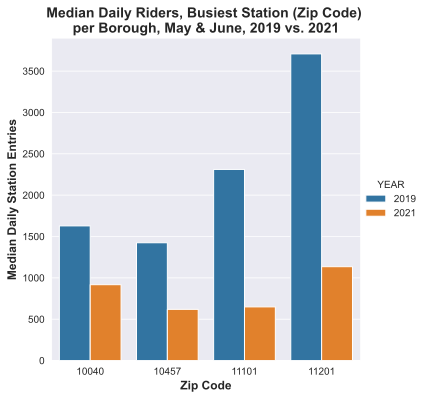

In [281]:
sns.set_style("darkgrid")
sns.catplot(x='ZIPCODE', y='NET_ENTRIES', hue='YEAR', data=busiest_top_stations_compare, kind='bar', ci=None)
plt.title('Median Daily Riders, Busiest Station (Zip Code) \nper Borough, May & June, 2019 vs. 2021', 
          fontdict={'weight': 'bold', 'fontsize': 14})
plt.xlabel("Zip Code", fontdict={'weight': 'bold', 'size': 12})
plt.ylabel("Median Daily Station Entries", fontdict={'weight': 'bold', 'size': 12});

In [318]:
# Create dataframe of relative % differences in ridership comparing the selected stations from 2019 to 2021

busiest_top_stations_relative = busiest_2019_top_stations.groupby('BOROUGH').sum().reset_index()
busiest_top_stations_relative['NET_ENTRIES'] = \
                    np.abs((busiest_2019_top_stations.groupby('BOROUGH').sum()['NET_ENTRIES'] -
                         compare_2021.groupby('BOROUGH').sum()['NET_ENTRIES']).values)
busiest_top_stations_relative['ZIPCODE'] = busiest_top_stations_relative['ZIPCODE'].astype('int')
busiest_top_stations_relative

,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR,YEAR
0,Bronx,805.0,1.0,10457,29767.0,38096.0,41432.0,50835.0,2019
1,Brooklyn,2573.0,1.0,11201,129248.0,176004.0,66937.0,74422.0,2019
2,Manhattan,710.5,1.0,10040,49677.0,56530.0,93651.0,126690.0,2019
3,Queens,1662.0,1.0,11101,75581.0,82636.0,73696.0,82534.0,2019


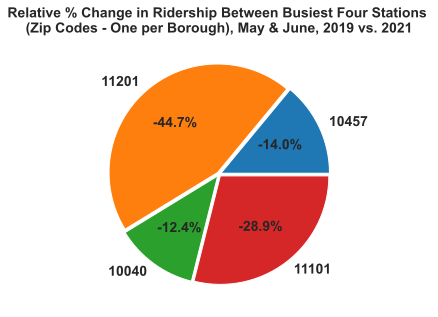

In [329]:
plt.figure(figsize=(5,5))
plt.pie(x=busiest_top_stations_relative['NET_ENTRIES'], 
        labels=busiest_top_stations_relative['ZIPCODE'],
        explode = [0.02]*4,
        autopct="-%.1f%%",
        textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Relative % Change in Ridership Between Busiest Four Stations \n(Zip Codes - One per Borough), May & June, 2019 vs. 2021',
          fontdict={'weight': 'bold', 'size': 14});

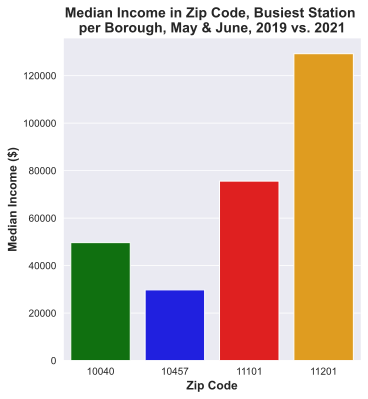

In [320]:
sns.set_style("darkgrid")
g = sns.catplot(x='ZIPCODE', y='MEDIAN_INCOME_ALL_ZIP', 
            data=busiest_top_stations_compare, kind='bar', 
            palette=['green', 'blue', 'red', 'orange'], ci=None)
plt.title('Median Income in Zip Code, Busiest Station \nper Borough, May & June, 2019 vs. 2021', 
          fontdict={'weight': 'bold', 'size': 14})
plt.xlabel("Zip Code", fontdict={'weight': 'bold', 'size': 12})
plt.ylabel("Median Income ($)", fontdict={'weight': 'bold', 'size': 12});

In [327]:
# Create dataframe of absolute % differences in ridership per selected station from 2019 to 2021

busiest_top_stations_absolute = busiest_2019_top_stations.groupby('BOROUGH').sum().reset_index()
busiest_top_stations_absolute['NET_ENTRIES'] = -100* \
           ((busiest_2019_top_stations.groupby('BOROUGH').sum()['NET_ENTRIES'] -
             compare_2021.groupby('BOROUGH').sum()['NET_ENTRIES']) / 
             busiest_2019_top_stations.groupby('BOROUGH').sum()['NET_ENTRIES']).values
busiest_top_stations_absolute['ZIPCODE'] = busiest_top_stations_absolute['ZIPCODE'].astype('int')
busiest_top_stations_absolute

,BOROUGH,NET_ENTRIES,WEEKDAY,ZIPCODE,MEDIAN_INCOME_ALL_ZIP,MEDIAN_INCOME_FAMILIES_ZIP,MEDIAN_INCOME_ALL_BOR,MEDIAN_INCOME_FAMILIES_BOR,YEAR
0,Bronx,-56.530899,1.0,10457,29767.0,38096.0,41432.0,50835.0,2019
1,Brooklyn,-69.390507,1.0,11201,129248.0,176004.0,66937.0,74422.0,2019
2,Manhattan,-43.642506,1.0,10040,49677.0,56530.0,93651.0,126690.0,2019
3,Queens,-71.916919,1.0,11101,75581.0,82636.0,73696.0,82534.0,2019


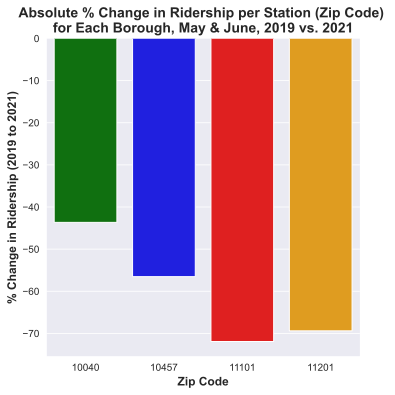

In [324]:
sns.set_style("darkgrid")
g = sns.catplot(x='ZIPCODE', y='NET_ENTRIES', 
            data=busiest_top_stations_absolute, kind='bar', 
            palette=['green', 'blue', 'red', 'orange'], ci=None)
plt.title('Absolute % Change in Ridership per Station (Zip Code) \nfor Each Borough, May & June, 2019 vs. 2021', 
          fontdict={'weight': 'bold', 'size': 14})
plt.xlabel("Zip Code", fontdict={'weight': 'bold', 'size': 12})
plt.ylabel("% Change in Ridership (2019 to 2021)", fontdict={'weight': 'bold', 'size': 12});